# Generative Jazz Licks: Evaluation and Validation

## Summary of this Notebook
* This is the third Notebook for training a generative Model for Jazz Licks
* This Notebook will evaluate the artifical generated jazz licks in 3 different parts
* **Statistics** 
    * The generated Data will be compared with the original data in various statistical parameters. The results will be visualized in certain epochs to show how the Network is learning the pattern over time. 
* **Imitation Game** 
    * Musical experts in the domain of jazz and classic were asked to guess if a lick is computer generated or not (10 Licks : 5 Training-data-licks and 5 generated-licks from different epochs).
    * Note: The generated Licks are compared with every training lick to exclude overfitting in the sample data (check_overfitting.py script to get viable licks)
* **Musical Analysis**
    * One generated midi File of each epoch will be analyzed with musical domain knowledge. Thus typical jazz patterns will be searched and discussed. The Jazz files will be the same like the MidiFiles from the 'Imitation Game' (if possible), else the files are taken randomly (index is randomly selected and then saved because the description needs to be consistent).

## imports

In [1]:
from utils.midi_tools import extract_notes_and_duration, build_note_dict
from utils.evaluate import *
from random import choices
from music21 import converter
from utils.check_overfitting import plot_overfitting_rate, collect_overfitting_and_names
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Config for Plots
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [2]:
length=17
test_folder = ["Ep5_Test", "Ep35_Test", "Ep70_Test", 
               "Ep80_Test", "Ep90_Test", "Ep180_Test"]
epochs = [0, 5, 35, 70, 80, 90, 180]

# Statistics

## Both

In [3]:
notes, durs = extract_notes_and_duration(scale='diatonic', show=False, both=True, 
                                                   length=length, save_data=False)

note_int, dur_int = build_note_dict(notes, durs)

lick_notes_transformed, overall_notes = transform_licks(extract_lick_elements(notes), note_int)
lick_durs_transformed, overall_durs = transform_licks(extract_lick_elements(durs), dur_int)

In [4]:
overall_notes_gen_global = []
overall_durs_gen_global = []

for folder in test_folder:  
    notes_gen, durs_gen = extract_notes_and_duration(scale=f'both/{folder}', show=False, both=True, 
                                                     length=length,
                                                     folder='generated_midi', save_data=False)

    note_int_gen, dur_int_gen = build_note_dict(notes_gen, durs_gen)

    lick_notes_transformed_gen, overall_notes_gen = transform_licks(extract_lick_elements(notes_gen), note_int_gen)
    lick_durs_transformed_gen, overall_durs_gen = transform_licks(extract_lick_elements(durs_gen), dur_int_gen)
    
    overall_notes_gen_global.append(overall_notes_gen)
    overall_durs_gen_global.append(overall_durs_gen)

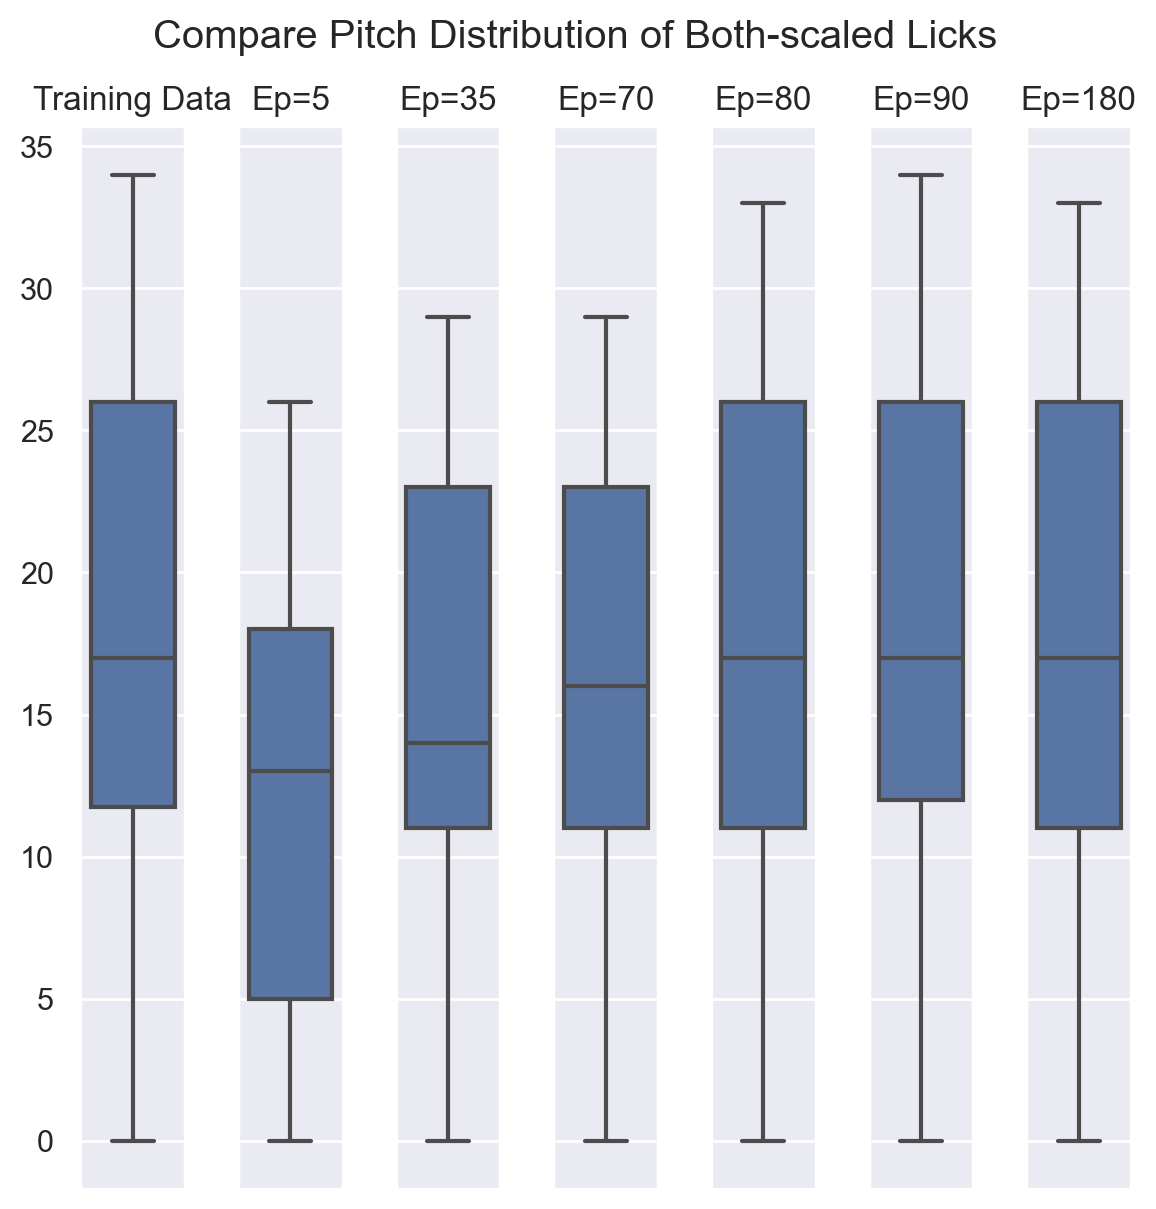

In [5]:
comparing_boxplot([overall_notes] + overall_notes_gen_global, epochs,
                  'Compare Pitch Distribution of Both-scaled Licks', 'Boxplots_Both_scales')

## Diatonic

In [6]:
notes_dia, durs_dia = extract_notes_and_duration(scale='diatonic', show=False, both=False, 
                                                 length=length, save_data=False)

note_int_dia, dur_int_dia = build_note_dict(notes_dia, durs_dia)

lick_notes_transformed_dia, overall_notes_dia = transform_licks(extract_lick_elements(notes_dia), note_int_dia)
lick_durs_transformed_dia, overall_durs_dia = transform_licks(extract_lick_elements(durs_dia), dur_int_dia)

In [7]:
overall_notes_gen_global_dia = []
overall_durs_gen_global_dia = []

for folder in test_folder: 
    
    notes_dia_gen, durs_dia_gen = extract_notes_and_duration(scale=f'diatonic/{folder}', show=False, both=False, 
                                                             length=length,
                                                             folder='generated_midi', save_data=False)

    note_int_dia_gen, dur_int_dia_gen = build_note_dict(notes_dia_gen, durs_dia_gen)

    lick_notes_transformed_dia_gen, overall_notes_dia_gen = transform_licks(extract_lick_elements(notes_dia_gen), note_int_dia_gen)
    lick_durs_transformed_dia_gen, overall_durs_dia_gen = transform_licks(extract_lick_elements(durs_dia_gen), dur_int_dia_gen)
    
    overall_notes_gen_global_dia.append(overall_notes_dia_gen)
    overall_durs_gen_global_dia.append(overall_durs_dia_gen)

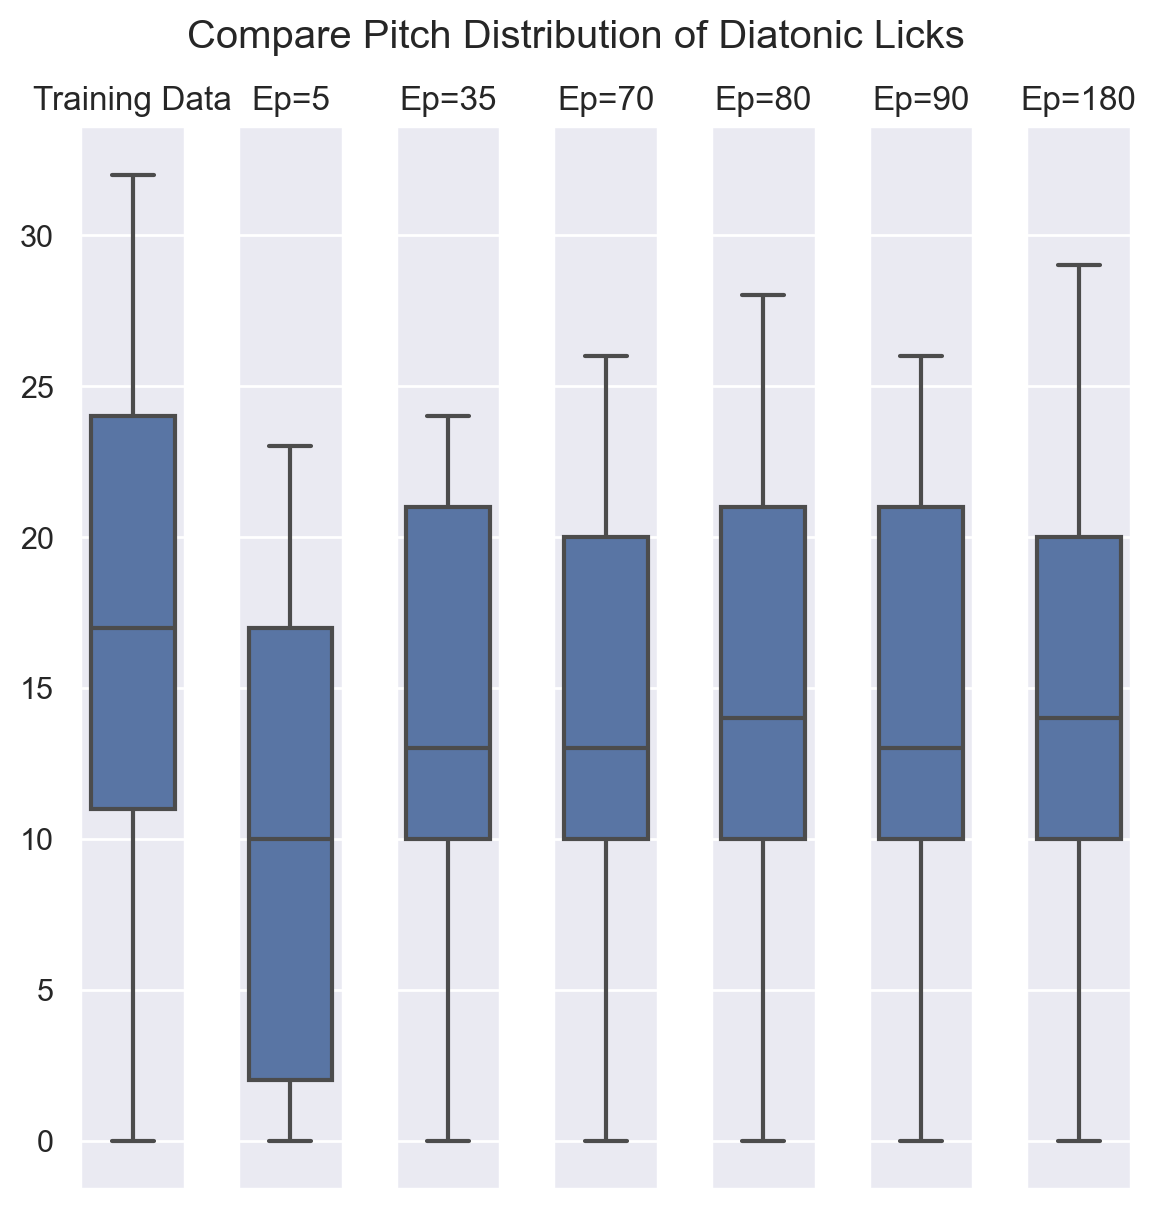

In [8]:
comparing_boxplot([overall_notes_dia] + overall_notes_gen_global_dia, epochs,
                  'Compare Pitch Distribution of Diatonic Licks', 'Boxplots_diatonic')

## Alterated

In [9]:
notes_alt, durs_alt = extract_notes_and_duration(scale='alterated', show=False, both=False, 
                                                 length=length, save_data=False)

note_int_alt, dur_int_alt = build_note_dict(notes_alt, durs_alt)

lick_notes_transformed_alt, overall_notes_alt = transform_licks(extract_lick_elements(notes_alt), note_int_alt)
lick_durs_transformed_alt, overall_durs_alt = transform_licks(extract_lick_elements(durs_alt), dur_int_alt)

In [10]:
overall_notes_gen_global_alt = []
overall_durs_gen_global_alt = []

for folder in test_folder: 

    notes_alt_gen, durs_alt_gen = extract_notes_and_duration(scale=f'alterated/{folder}', show=False, both=False, 
                                                             length=length,
                                                             folder='generated_midi', save_data=False)

    note_int_alt_gen, dur_int_alt_gen = build_note_dict(notes_alt_gen, durs_alt_gen)

    lick_notes_transformed_alt_gen, overall_notes_alt_gen = transform_licks(extract_lick_elements(notes_alt_gen), note_int_alt_gen)
    lick_durs_transformed_alt_gen, overall_durs_alt_gen = transform_licks(extract_lick_elements(durs_alt_gen), dur_int_alt_gen)
    
    overall_notes_gen_global_alt.append(overall_notes_alt_gen)
    overall_durs_gen_global_alt.append(overall_durs_alt_gen)

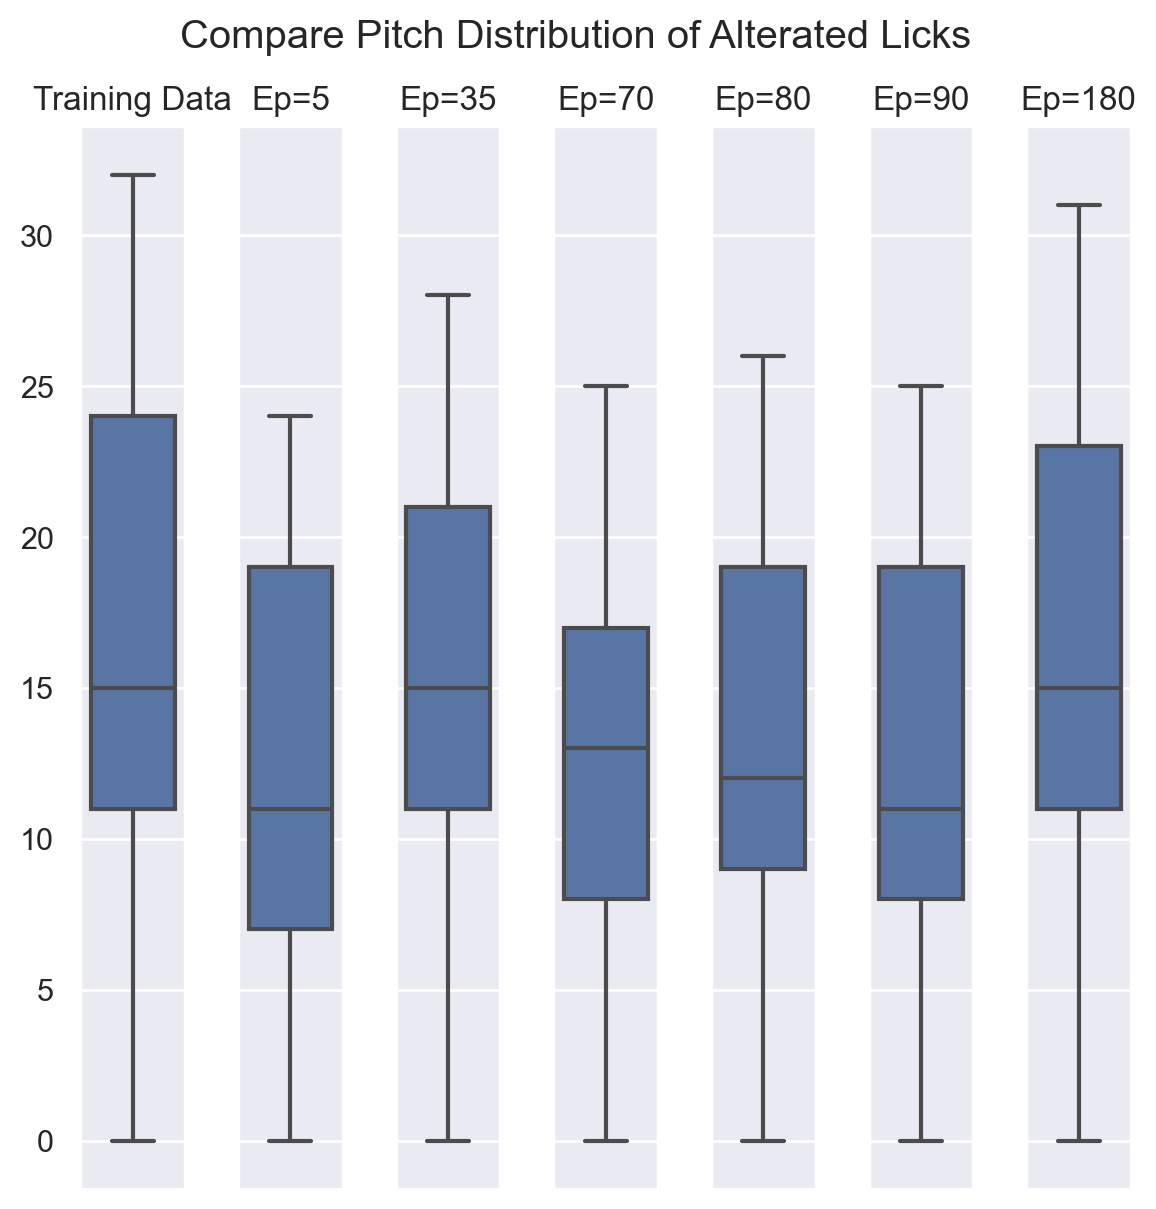

In [11]:
comparing_boxplot([overall_notes_alt] + overall_notes_gen_global_alt, epochs,
                  'Compare Pitch Distribution of Alterated Licks', 'Boxplots_alterated')

# T-Test for Pitch and Duration & Density

## Both

### T-Test

In [12]:
show_p_vals(overall_notes_gen_global, overall_durs_gen_global, 
            overall_notes, overall_durs, epochs[1:])


Epoch = 5
P Value for Durations: 1.7e-87 Significant: True
P Value for Pitch: 4.9e-23 Significant: True


Epoch = 35
P Value for Durations: 4e-21 Significant: True
P Value for Pitch: 3.6e-23 Significant: True


Epoch = 70
P Value for Durations: 1.3e-12 Significant: True
P Value for Pitch: 1.1e-15 Significant: True


Epoch = 80
P Value for Durations: 0.019 Significant: True
P Value for Pitch: 0.0075 Significant: True


Epoch = 90
P Value for Durations: 0.74 Significant: False
P Value for Pitch: 0.0051 Significant: True


Epoch = 180
P Value for Durations: 0.17 Significant: False
P Value for Pitch: 0.0094 Significant: True



### Density

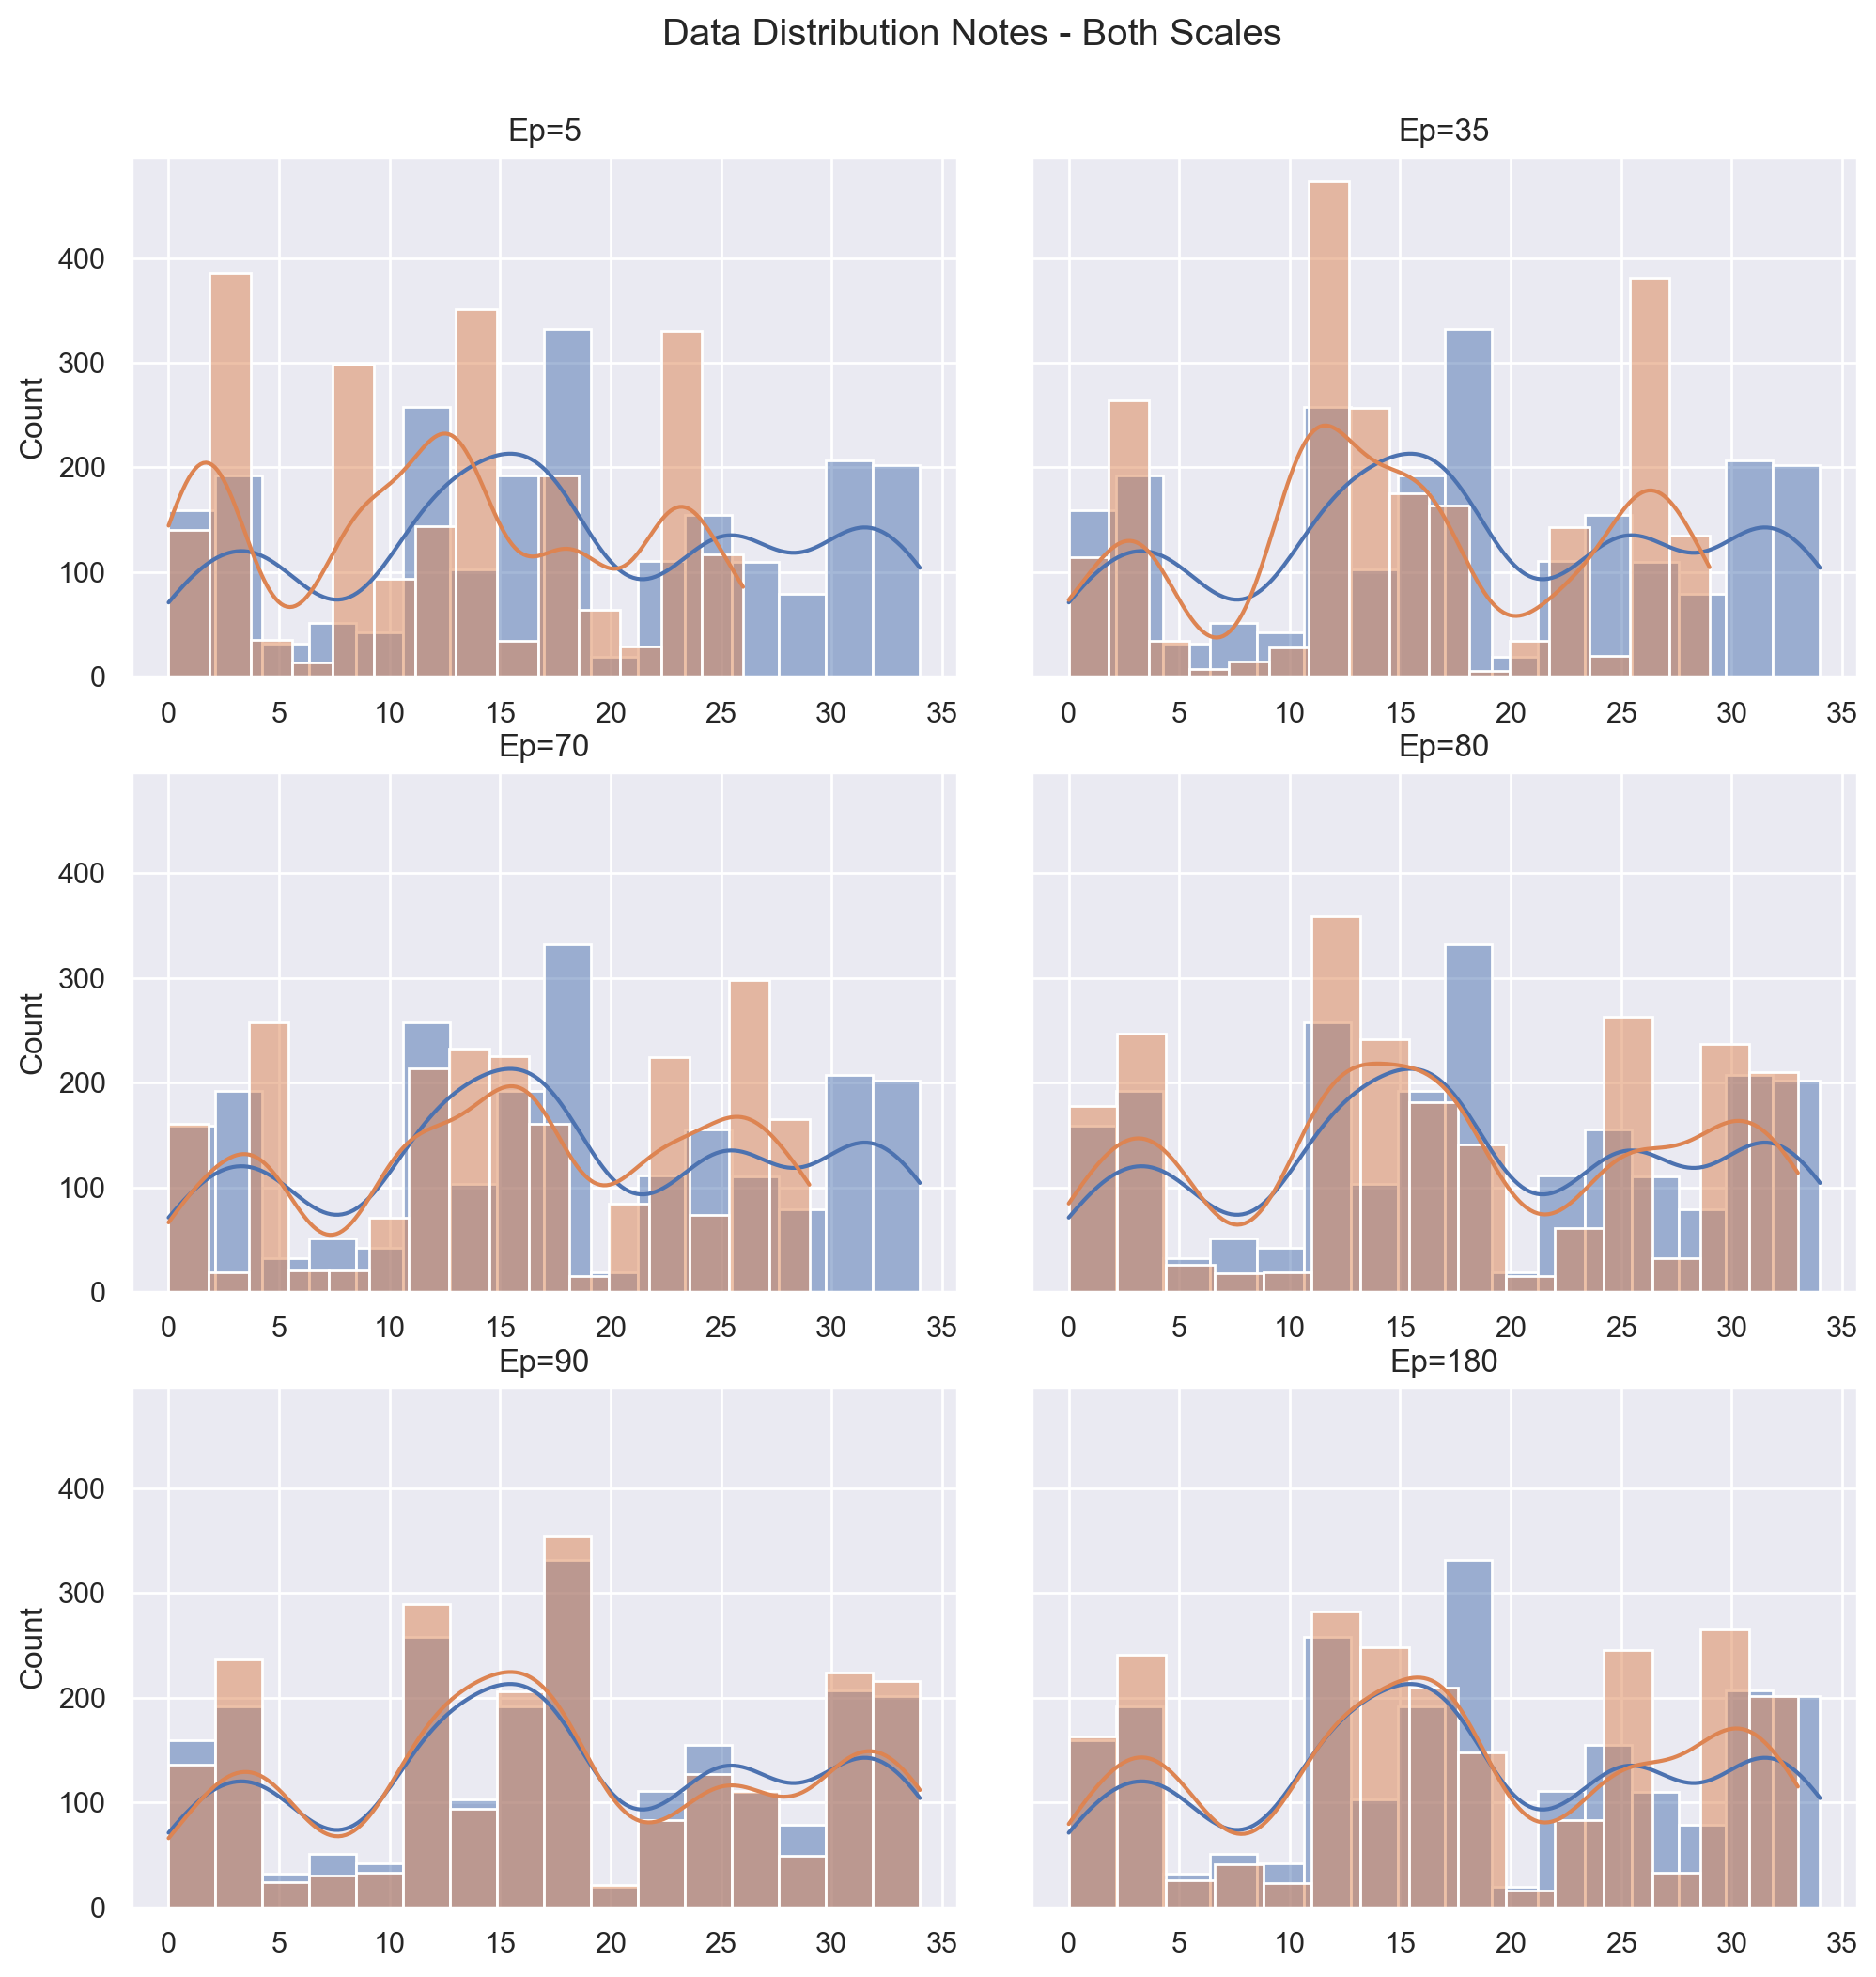

In [13]:
plot_data_distribution(overall_notes, overall_notes_gen_global,
                       'Data Distribution Notes - Both Scales', 
                       epochs[1:], 'Histplot_notes_both_scales')

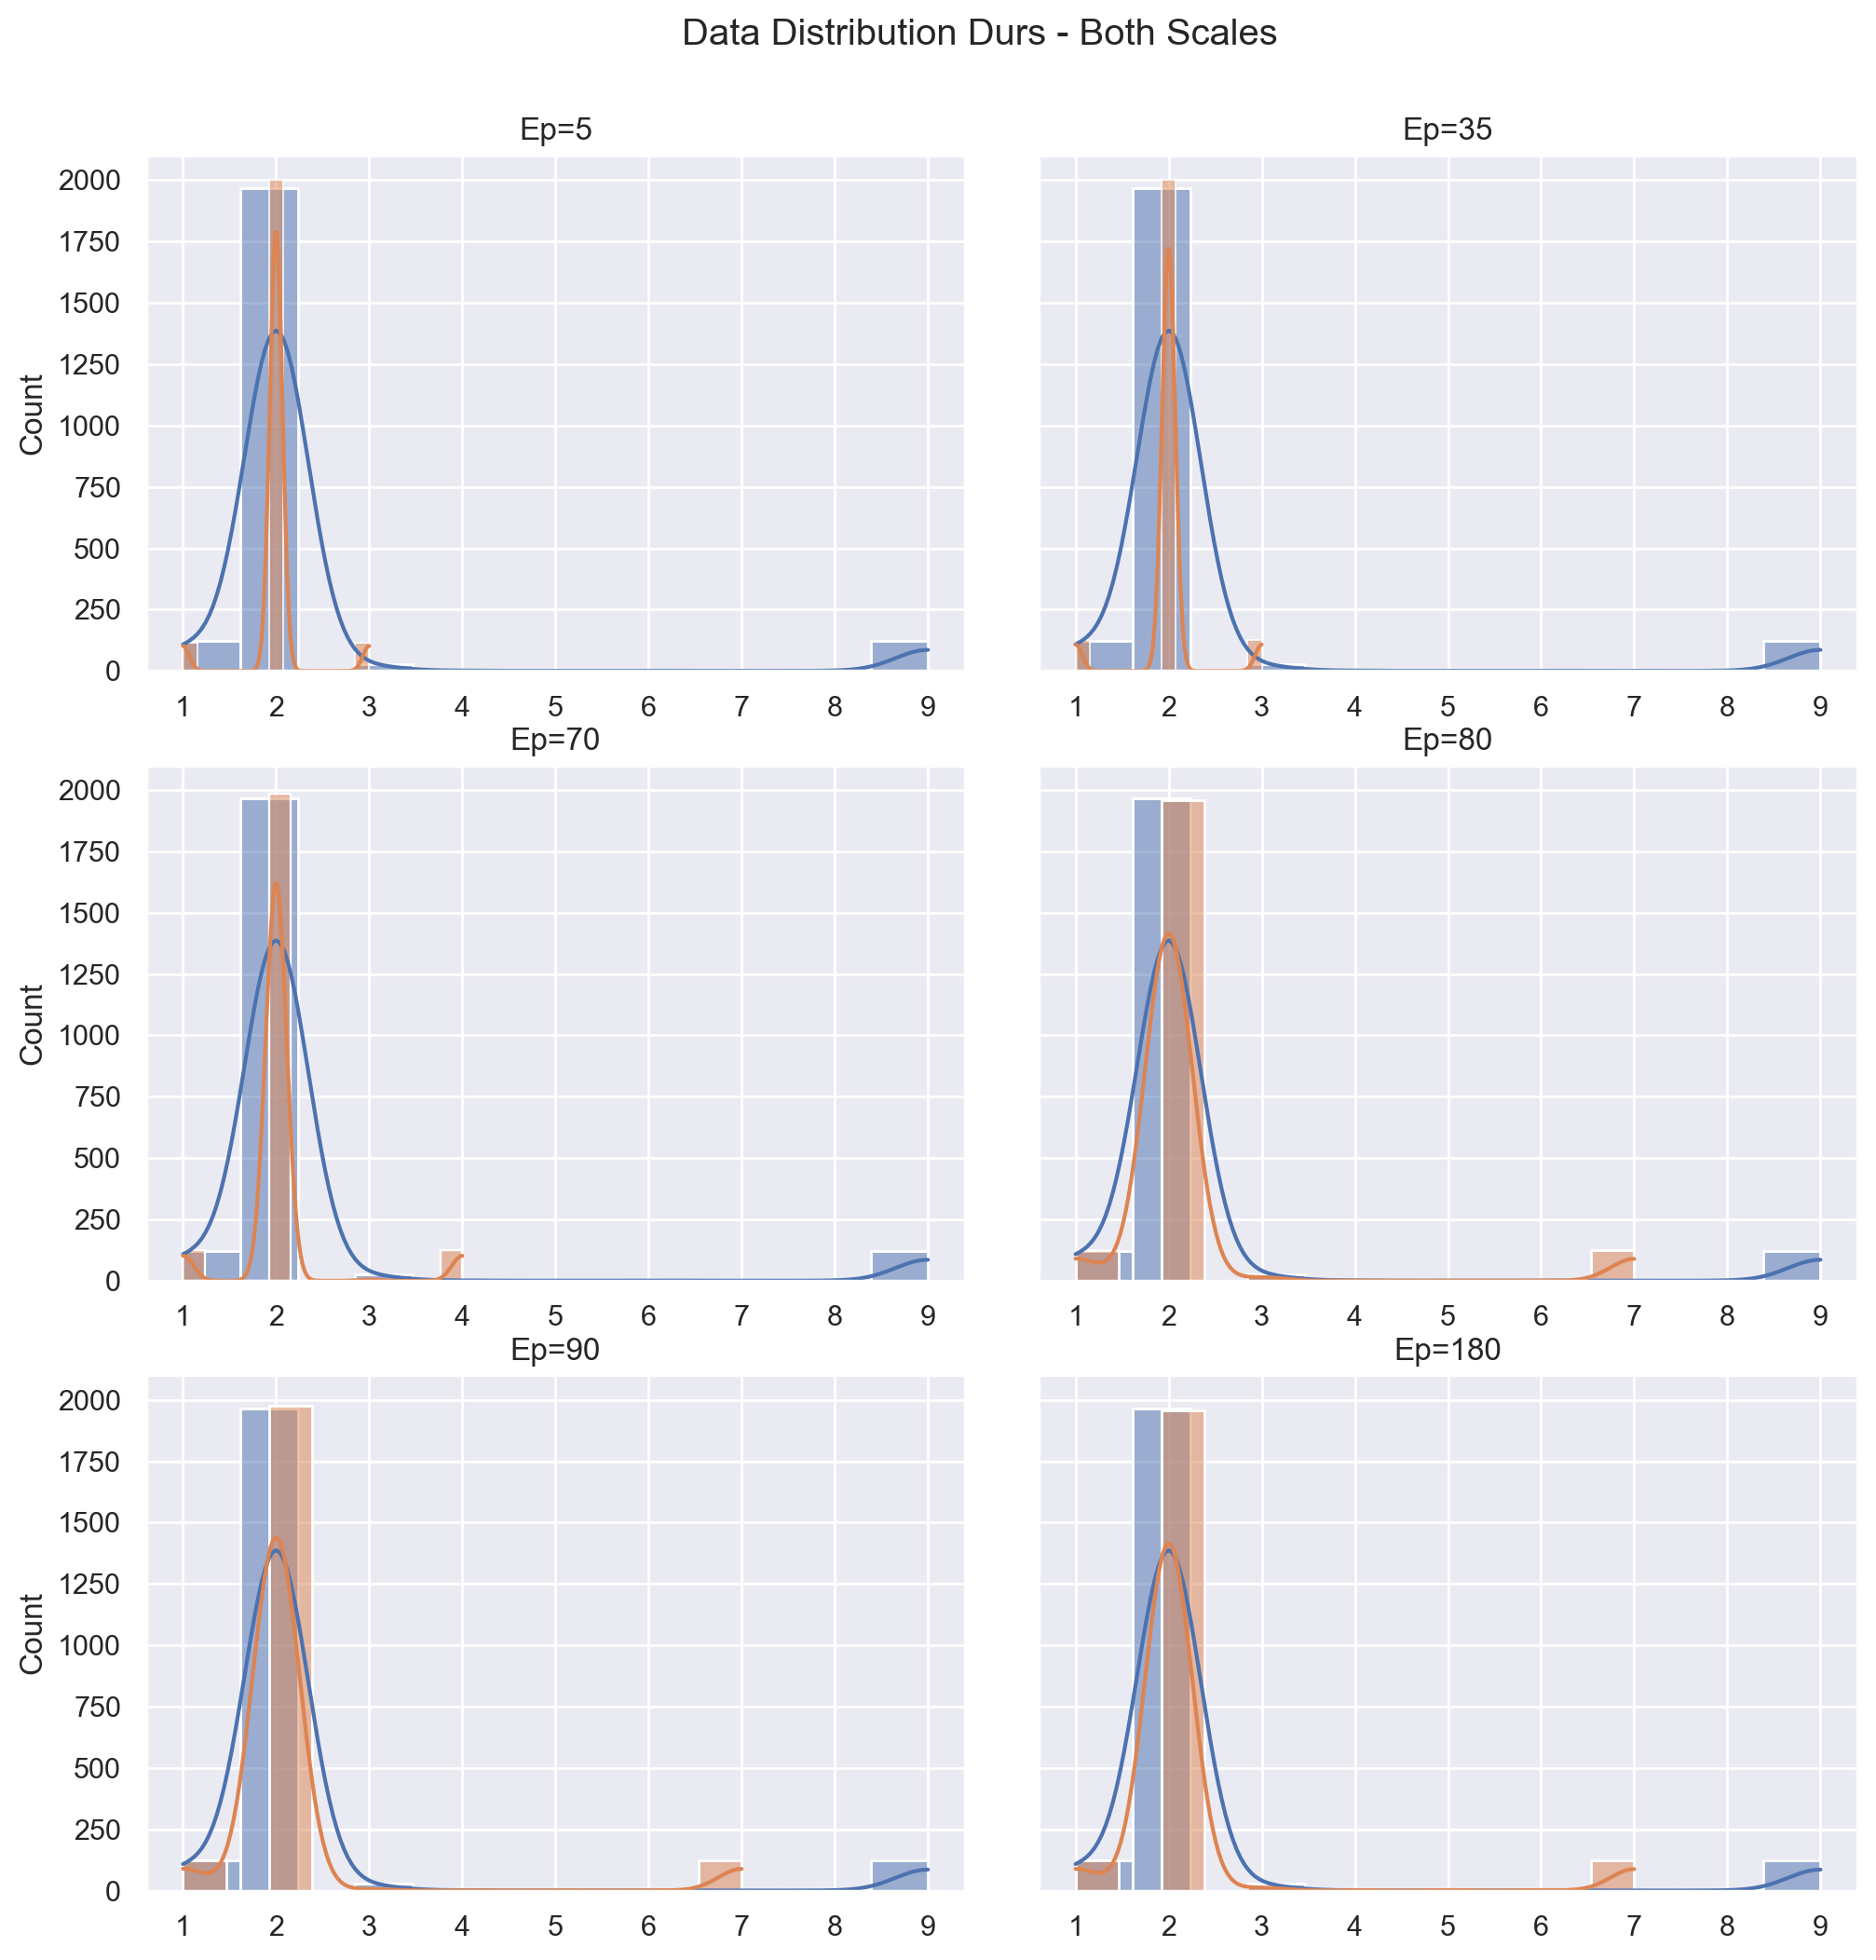

In [14]:
plot_data_distribution(overall_durs, overall_durs_gen_global,
                       'Data Distribution Durs - Both Scales', 
                       epochs[1:], 'Histplot_durs_both_scales')

## Diatonic

In [15]:
show_p_vals(overall_notes_gen_global_dia, overall_durs_gen_global_dia, 
            overall_notes_dia, overall_durs_dia, epochs[1:])


Epoch = 5
P Value for Durations: 2.6e-71 Significant: True
P Value for Pitch: 0.18 Significant: False


Epoch = 35
P Value for Durations: 2.1e-24 Significant: True
P Value for Pitch: 1.9e-08 Significant: True


Epoch = 70
P Value for Durations: 1.2e-23 Significant: True
P Value for Pitch: 0.0055 Significant: True


Epoch = 80
P Value for Durations: 2.4e-11 Significant: True
P Value for Pitch: 0.0083 Significant: True


Epoch = 90
P Value for Durations: 3.8e-20 Significant: True
P Value for Pitch: 0.75 Significant: False


Epoch = 180
P Value for Durations: 5e-12 Significant: True
P Value for Pitch: 0.0092 Significant: True



### Density

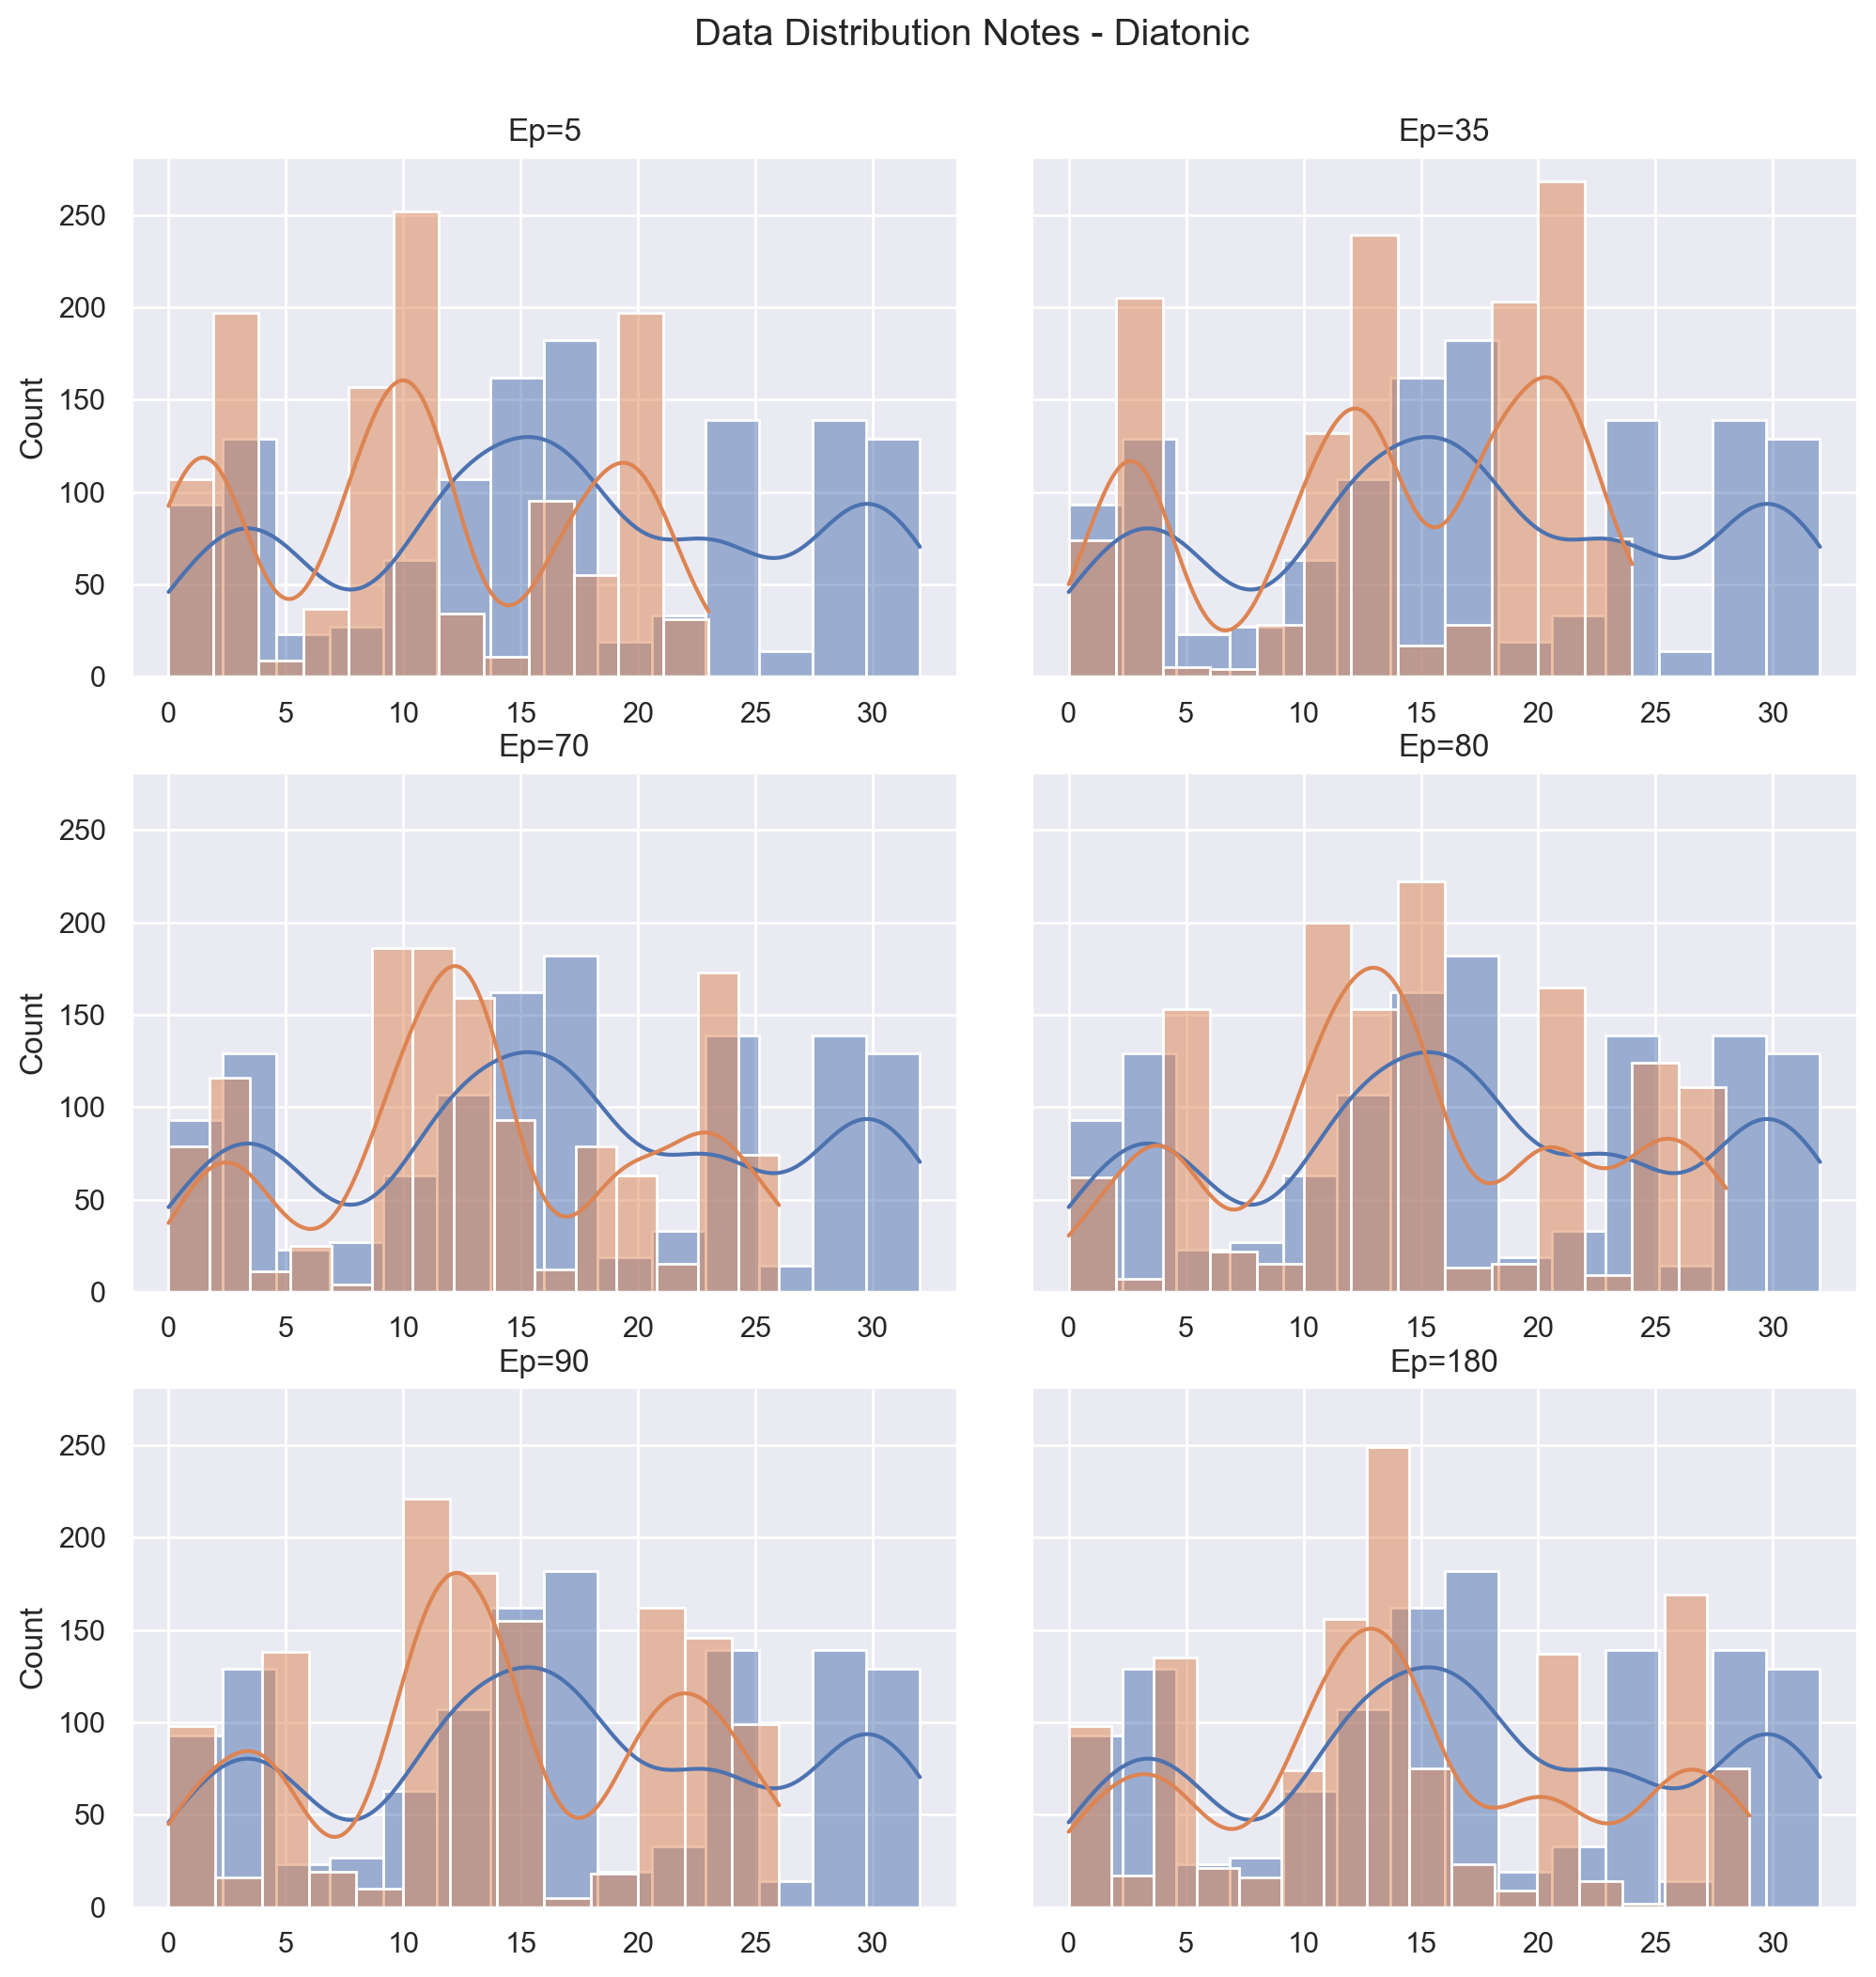

In [16]:
plot_data_distribution(overall_notes_dia, overall_notes_gen_global_dia,
                       'Data Distribution Notes - Diatonic', 
                       epochs[1:], 'Histplot_notes_diatonic')

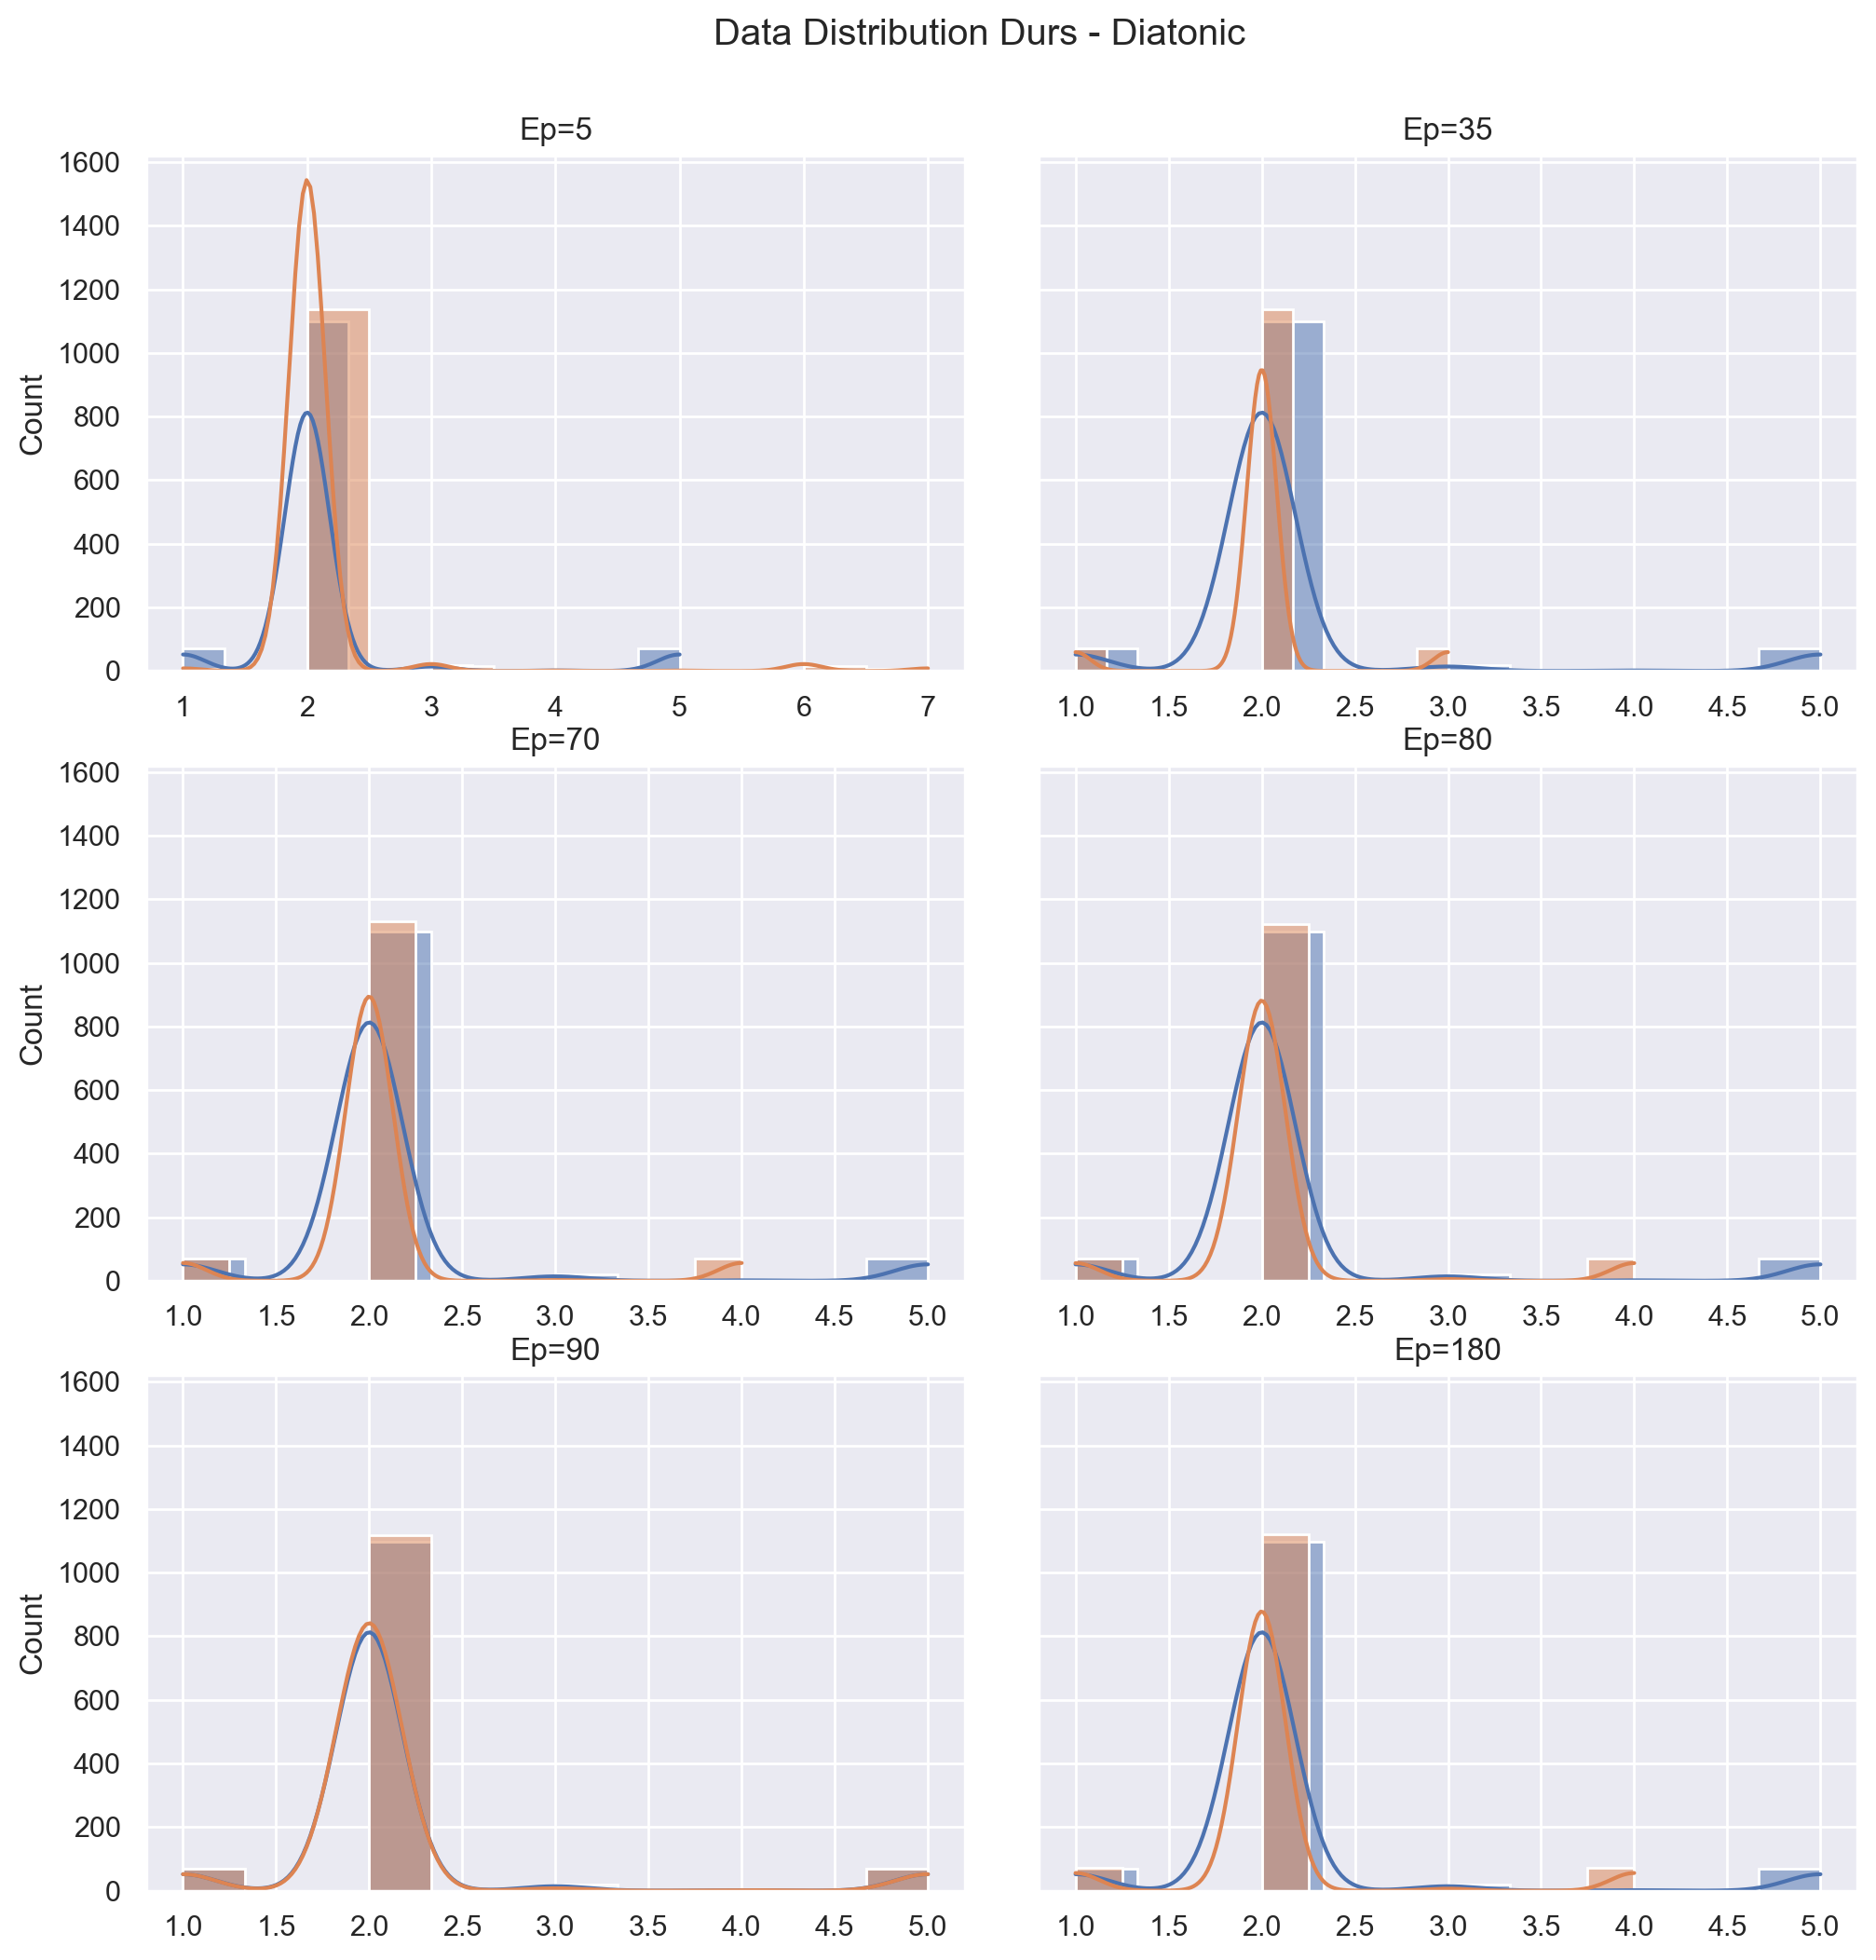

In [17]:
plot_data_distribution(overall_durs_dia, overall_durs_gen_global_dia,
                       'Data Distribution Durs - Diatonic', 
                       epochs[1:], 'Histplot_durs_diatonic')

## Alterated

### T-Test

In [18]:
show_p_vals(overall_notes_gen_global_alt, overall_durs_gen_global_alt, 
            overall_notes_alt, overall_durs_alt, epochs[1:])


Epoch = 5
P Value for Durations: 6e-37 Significant: True
P Value for Pitch: 3.6e-07 Significant: True


Epoch = 35
P Value for Durations: 0.0001 Significant: True
P Value for Pitch: 0.017 Significant: True


Epoch = 70
P Value for Durations: 2.6e-27 Significant: True
P Value for Pitch: 6.8e-10 Significant: True


Epoch = 80
P Value for Durations: 1.6e-19 Significant: True
P Value for Pitch: 6.8e-10 Significant: True


Epoch = 90
P Value for Durations: 7.4e-29 Significant: True
P Value for Pitch: 0.3 Significant: False


Epoch = 180
P Value for Durations: 0.49 Significant: False
P Value for Pitch: 0.33 Significant: False



### Density

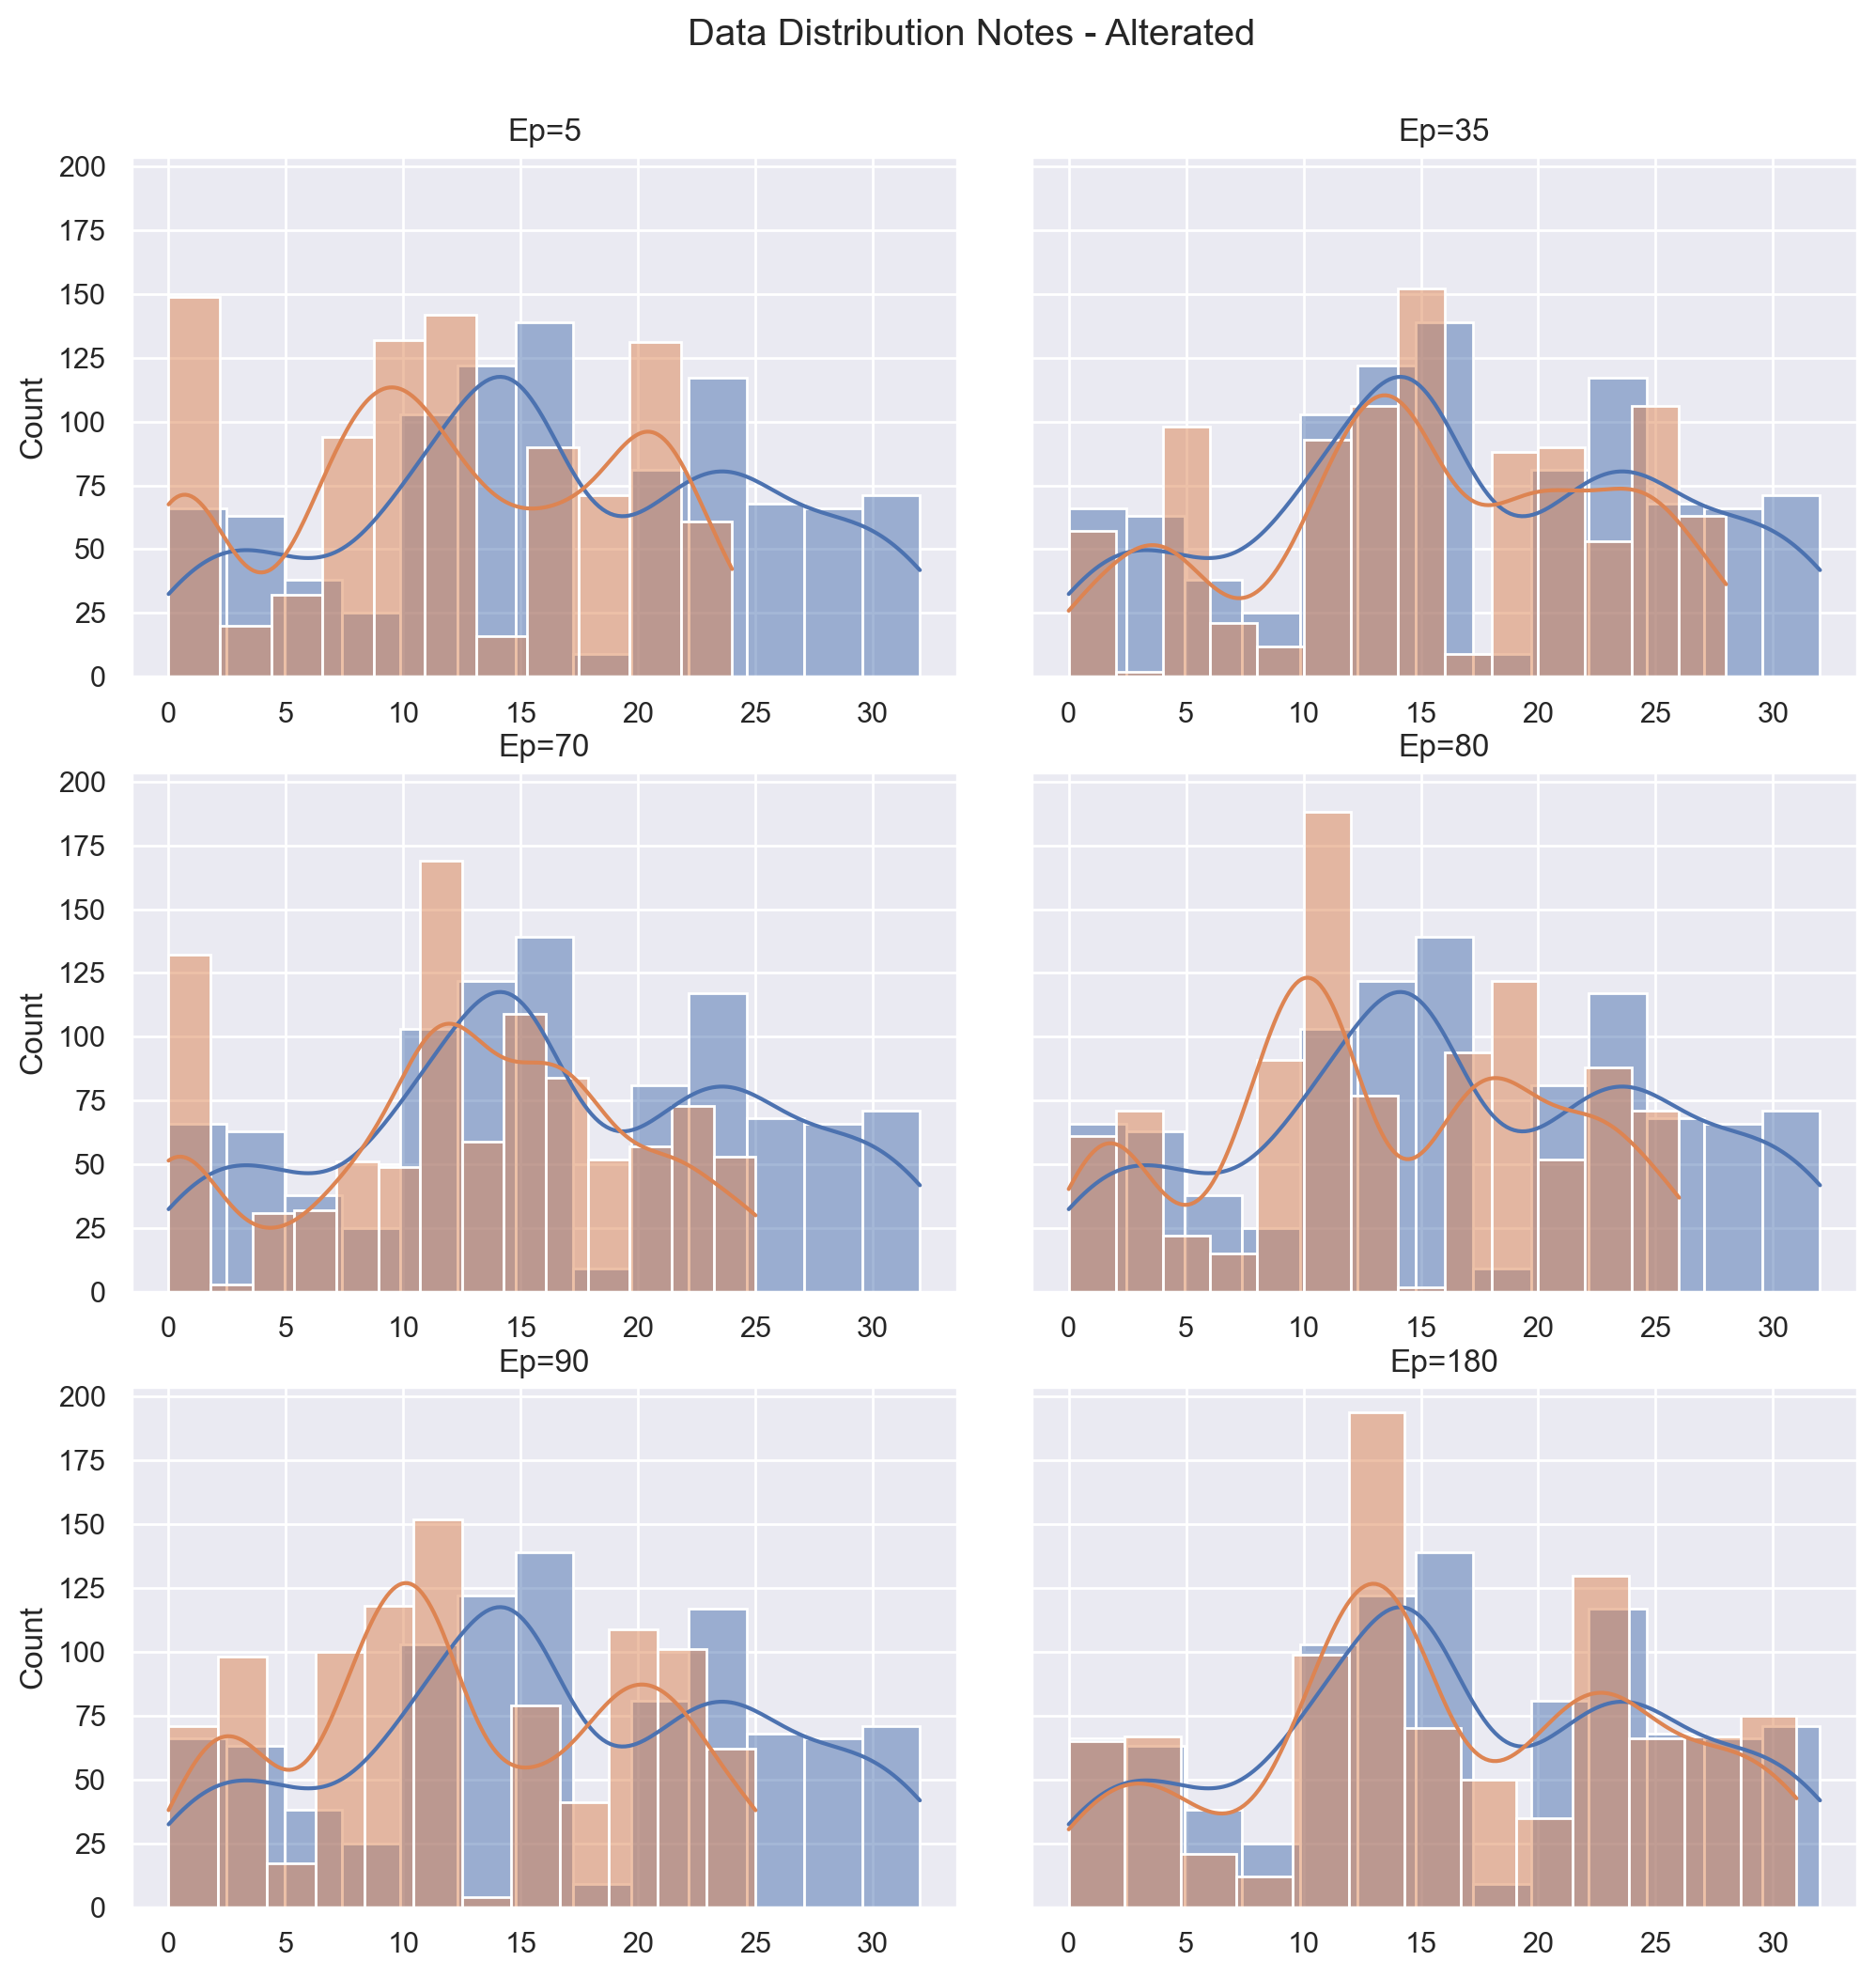

In [19]:
plot_data_distribution(overall_notes_alt, overall_notes_gen_global_alt,
                       'Data Distribution Notes - Alterated', 
                       epochs[1:], 'Histplot_notes_alterated')

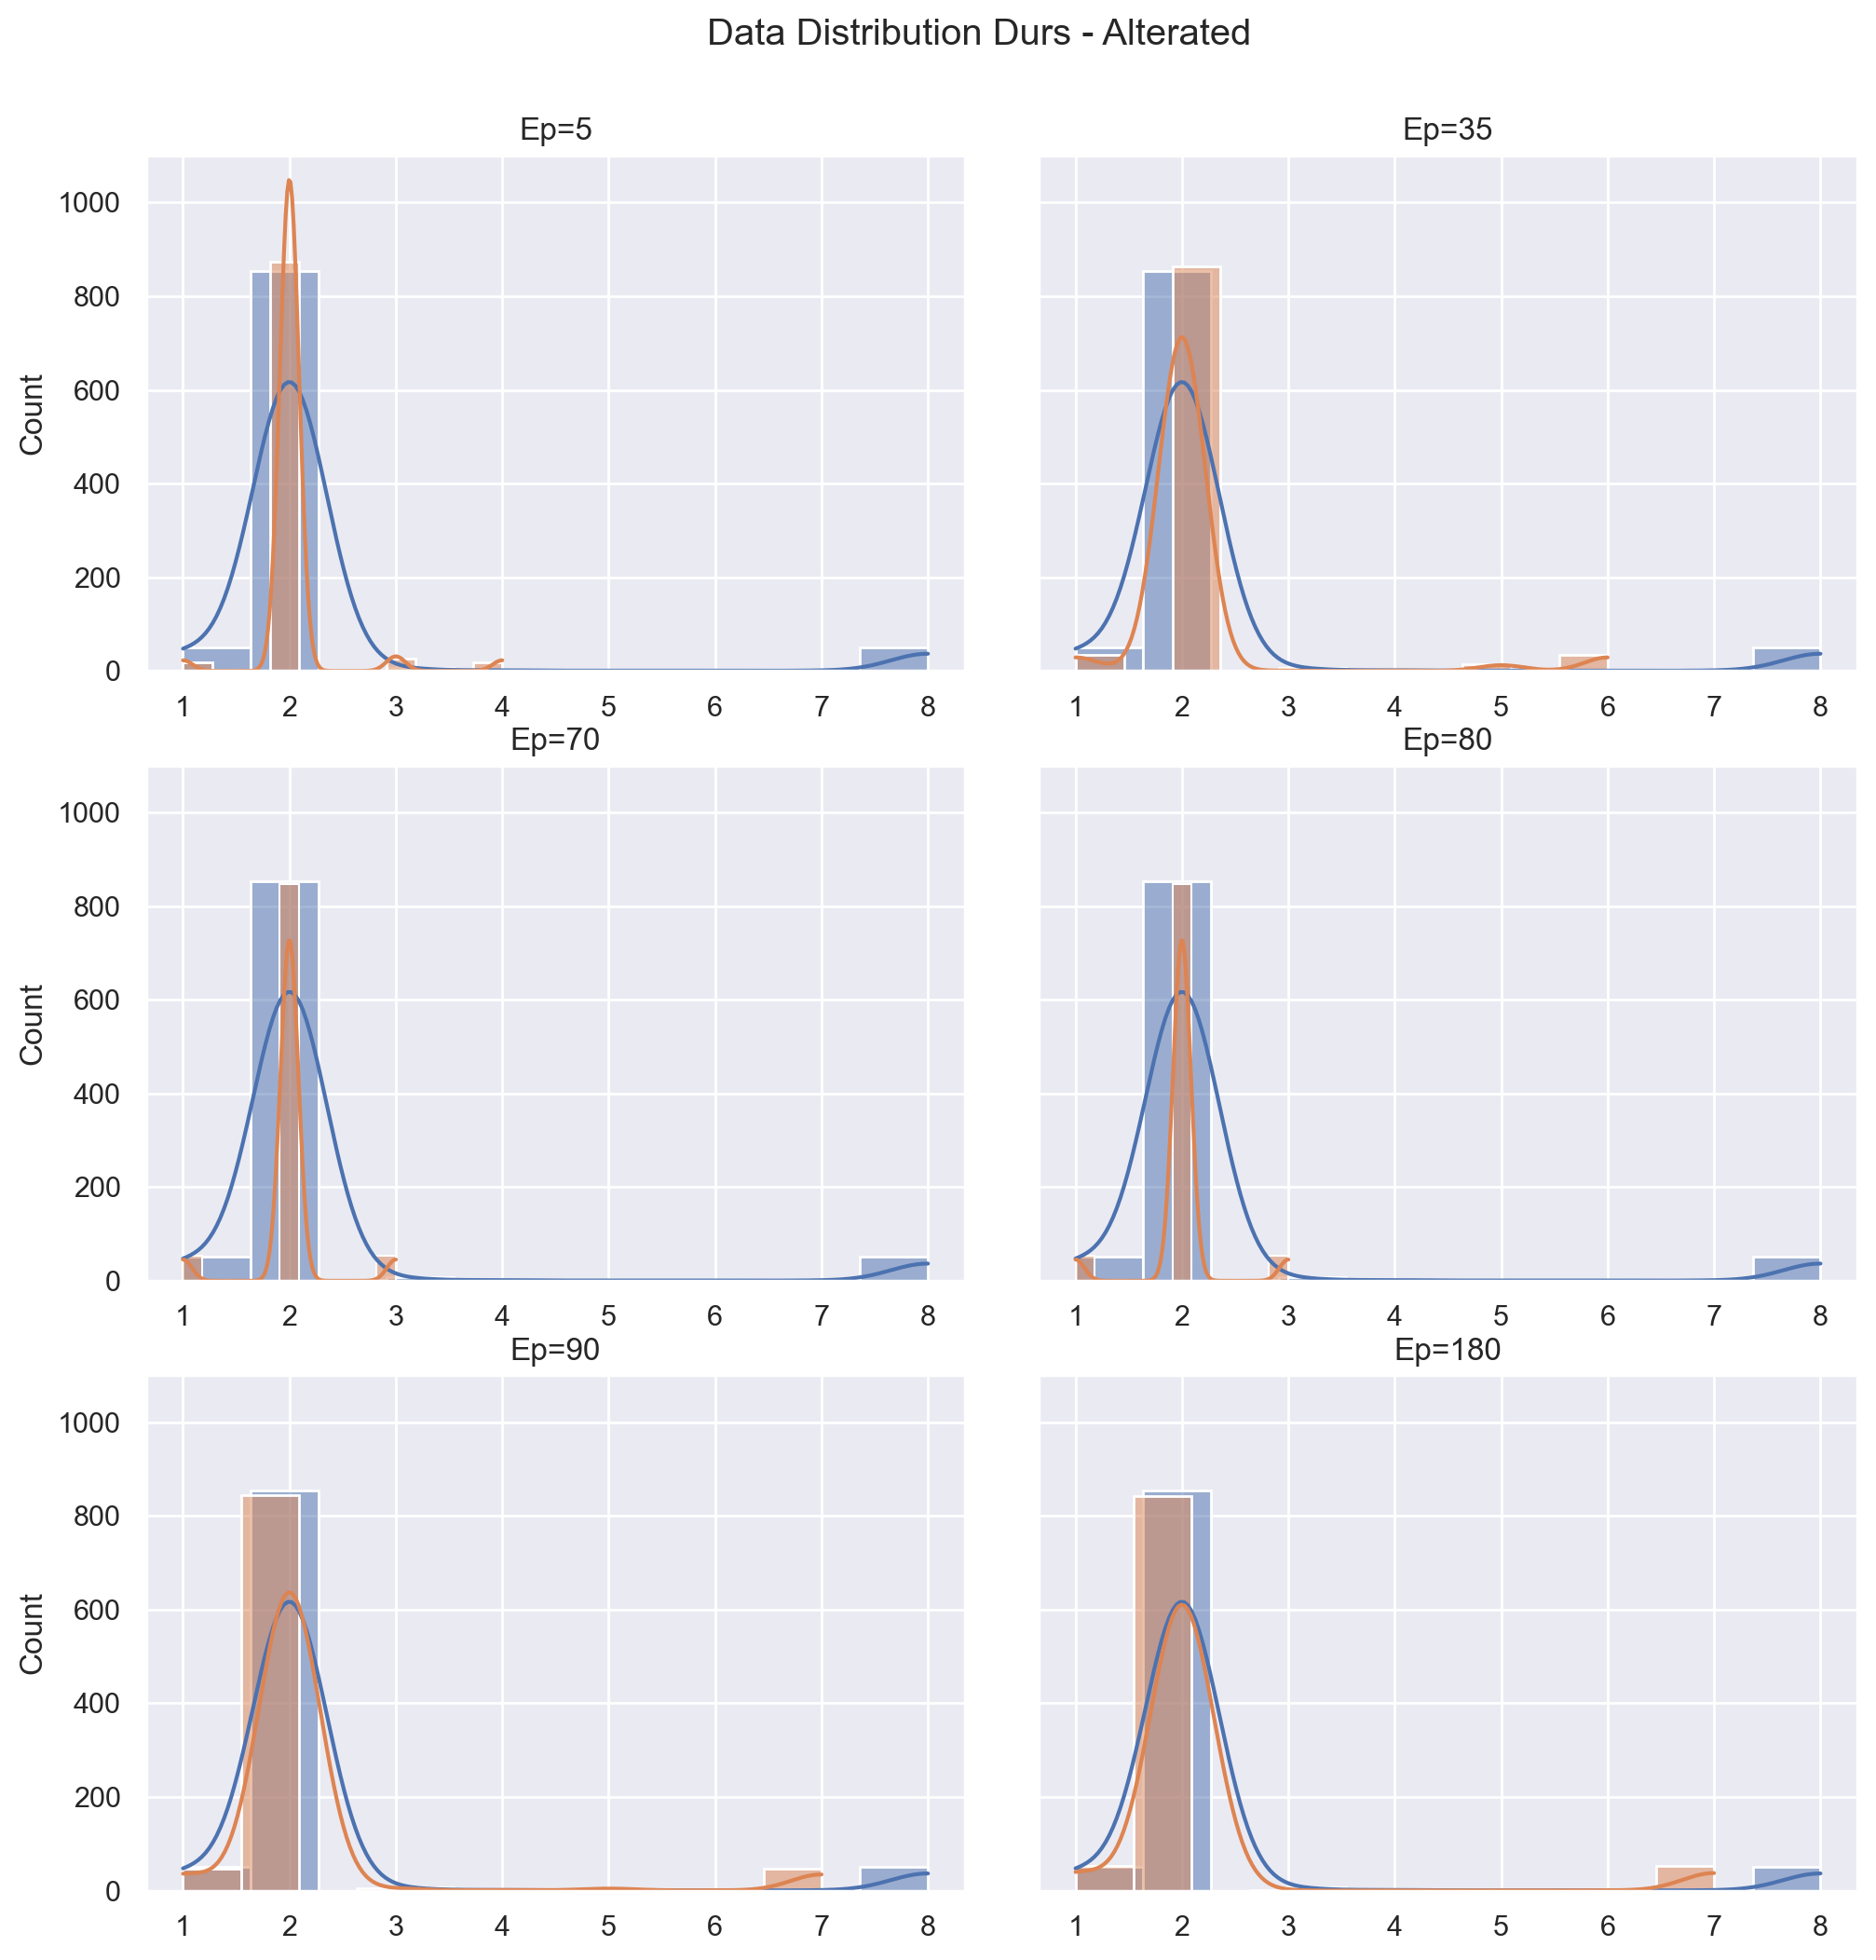

In [20]:
plot_data_distribution(overall_durs_alt, overall_durs_gen_global_alt,
                       'Data Distribution Durs - Alterated', 
                       epochs[1:], 'Histplot_durs_alterated')

## Show the amount of overfitted results

## Both

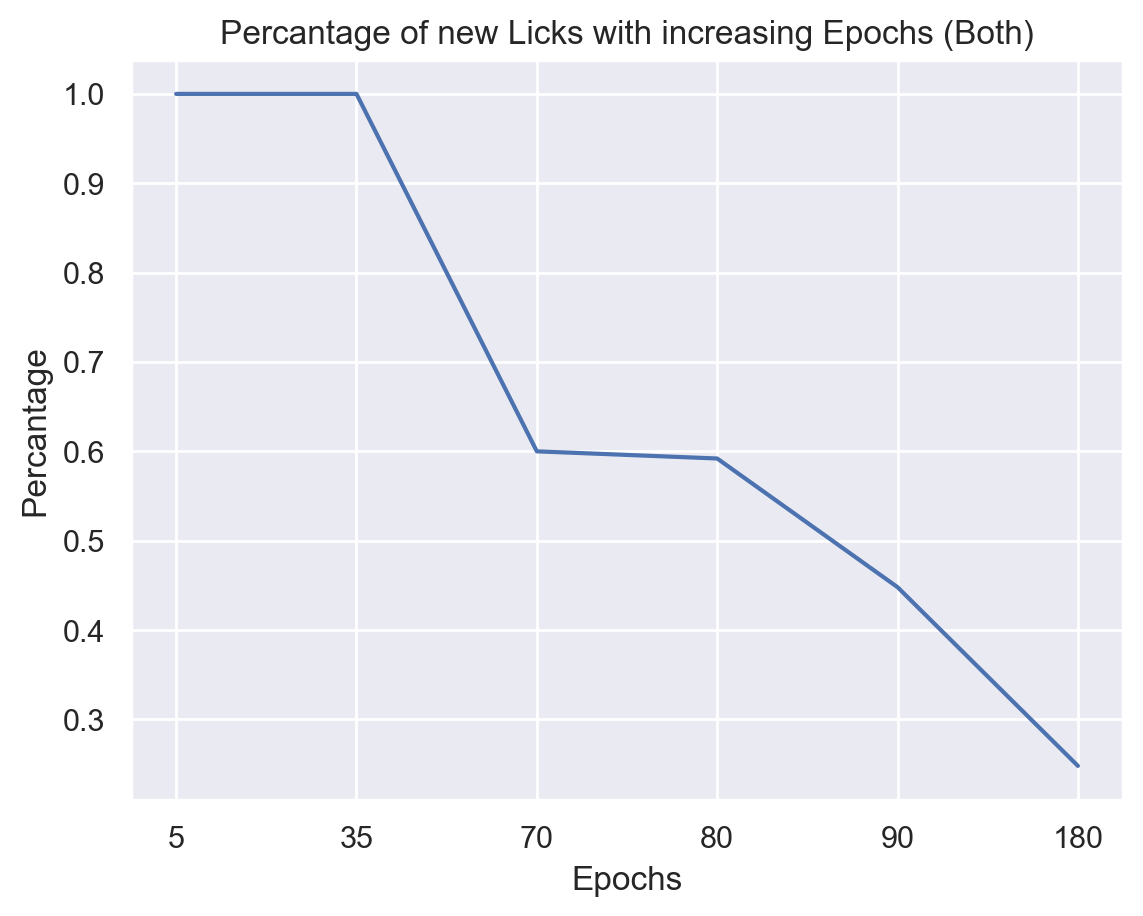

In [7]:
overfitting_scores, viable_names = collect_overfitting_and_names(test_folder)
plot_overfitting_rate(overfitting_scores, 'Both')

## Diatonic

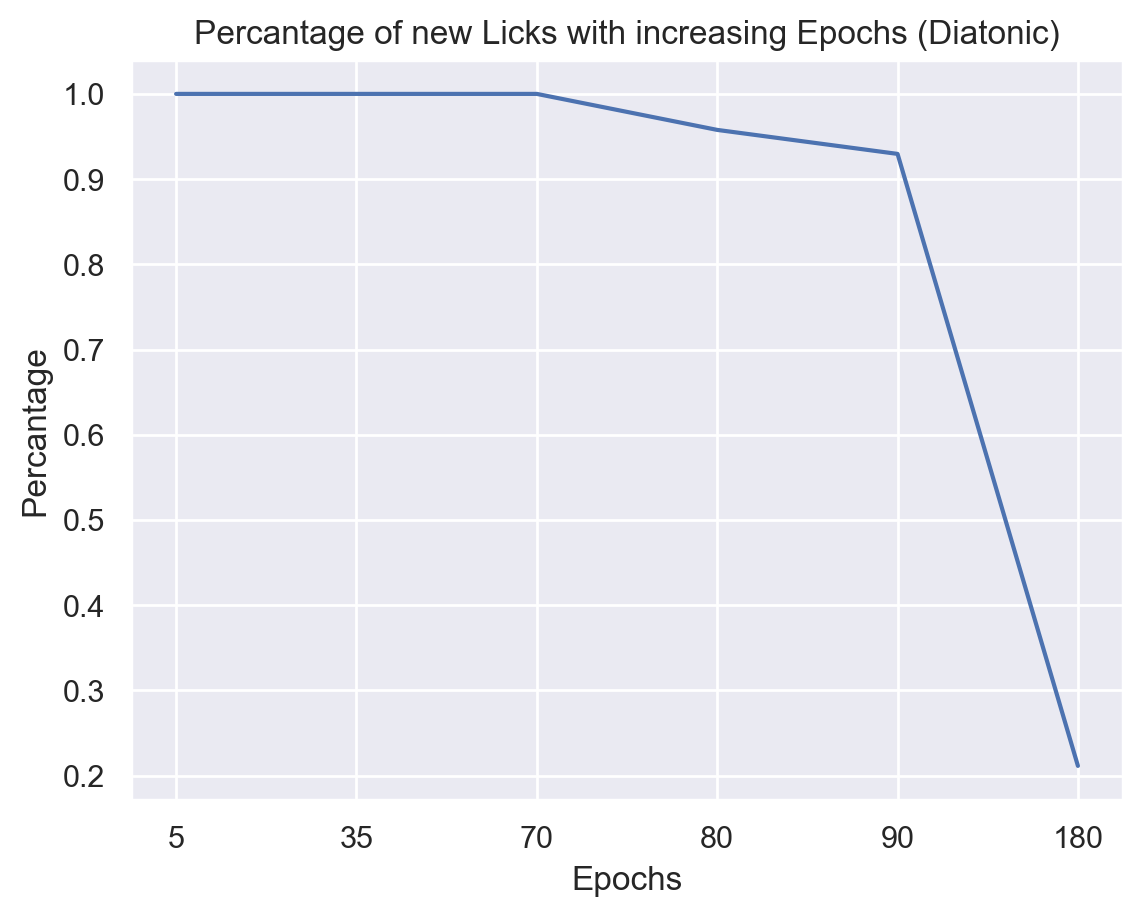

In [5]:
overfitting_scores_dia, viable_names_dia = collect_overfitting_and_names(test_folder, scale='diatonic')
plot_overfitting_rate(overfitting_scores_dia, 'Diatonic')

## Alterated

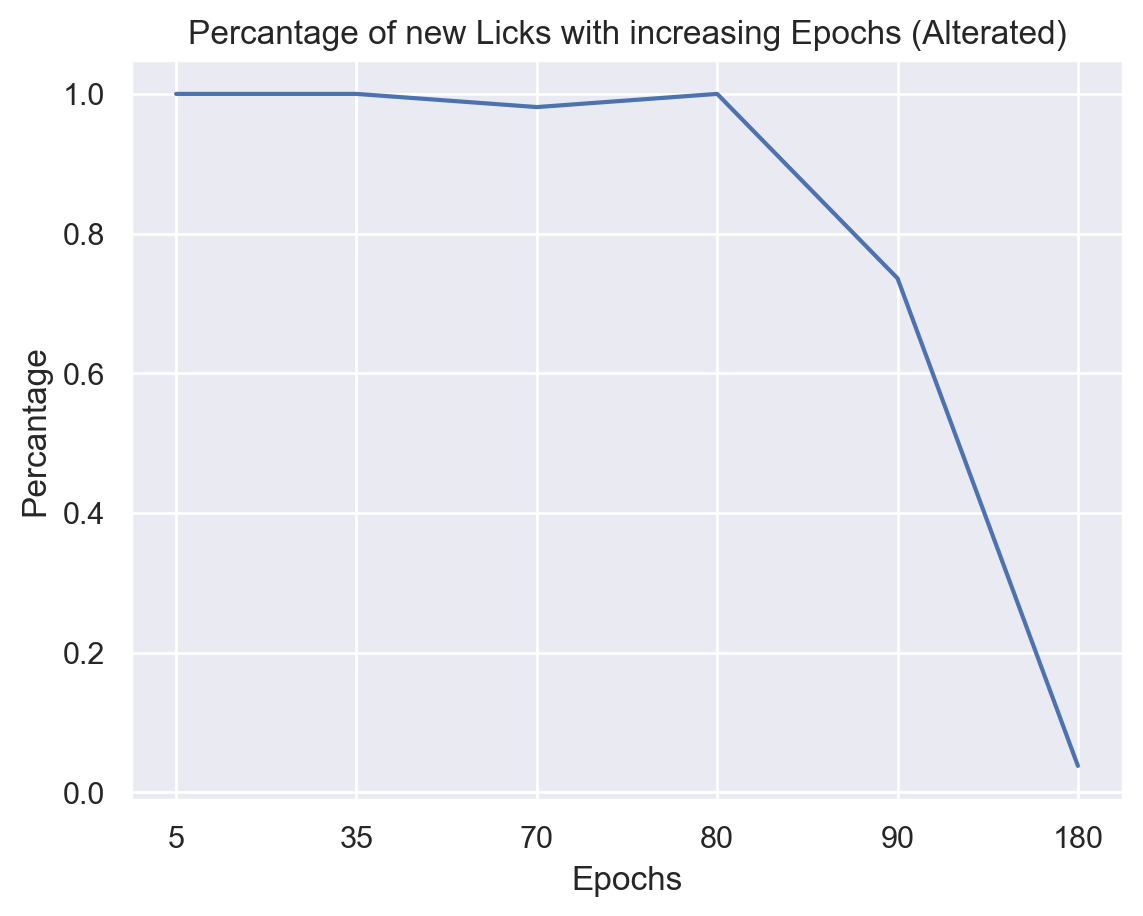

In [6]:
overfitting_scores_alt, viable_names_alt = collect_overfitting_and_names(test_folder, scale='alterated')
plot_overfitting_rate(overfitting_scores_alt, 'Alterated')

## Determing Licks for Sampeling

In [45]:
# Taking 2 Alterated; 2 Diatonic; and 1 from 'Both'-Scales 
# Licks are drawn randomly
# EP 180
both_licks = choices(viable_names[-1], k=1)
dia_licks = choices(viable_names_dia[-1], k=2)
# EP 90
alt_licks = choices(viable_names_alt[-2], k=2)

print('Both: ', both_licks)
print('Diatonic: ', dia_licks)
print('Alterated: ', alt_licks)

Both:  ['Generated_Lick_both_58.mid']
Diatonic:  ['Generated_Lick_diatonic_51.mid', 'Generated_Lick_diatonic_45.mid']
Alterated:  ['Generated_Lick_alterated_42.mid', 'Generated_Lick_alterated_30.mid']


# Imitation Game (EDA)

## Data Reading + Processing

In [3]:
# Read the dataframe
# Col Lick1 - Lick10 corresponds to a computer generated Lick (True/False)
# Col Jazz shows if the musician has a connection to the jazz music
# Col B1 - B10 is a subjectiv assessement of the Lick

df = pd.read_csv('data/evaluation_data.csv')
# Transform j to True and n to False
df[df.columns[:10]] = df[df.columns[:10]].apply(lambda char: char == 'j')
# Transform 1 to True and 0 to False
df['Jazz'] = df['Jazz'].astype(bool)
df.head()

,Lick1,Lick2,Lick3,Lick4,Lick5,Lick6,Lick7,Lick8,Lick9,Lick10,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,True,False,True,True,False,False,False,False,True,True,...,8,7,7,7,6,6,6,6,7,7
1,False,True,True,True,True,False,False,False,True,True,...,6,5,8,6,7,8,7,8,7,6
2,False,False,True,True,False,False,True,True,False,False,...,1,1,1,1,2,2,1,2,2,3
3,True,False,True,False,False,False,False,True,True,False,...,6,8,7,8,8,8,8,6,6,7
4,True,True,True,False,False,False,True,False,True,True,...,4,4,5,6,7,6,4,6,4,4


## Evaluation Plot 1 : Is a Lick Computer generated?

In [4]:
training_indices = [2, 4, 5, 7, 8]
generated_indices = [0, 1, 3, 6, 9]

training_licks_df = df[df.columns[training_indices]]
generated_licks_df = df[df.columns[generated_indices]]

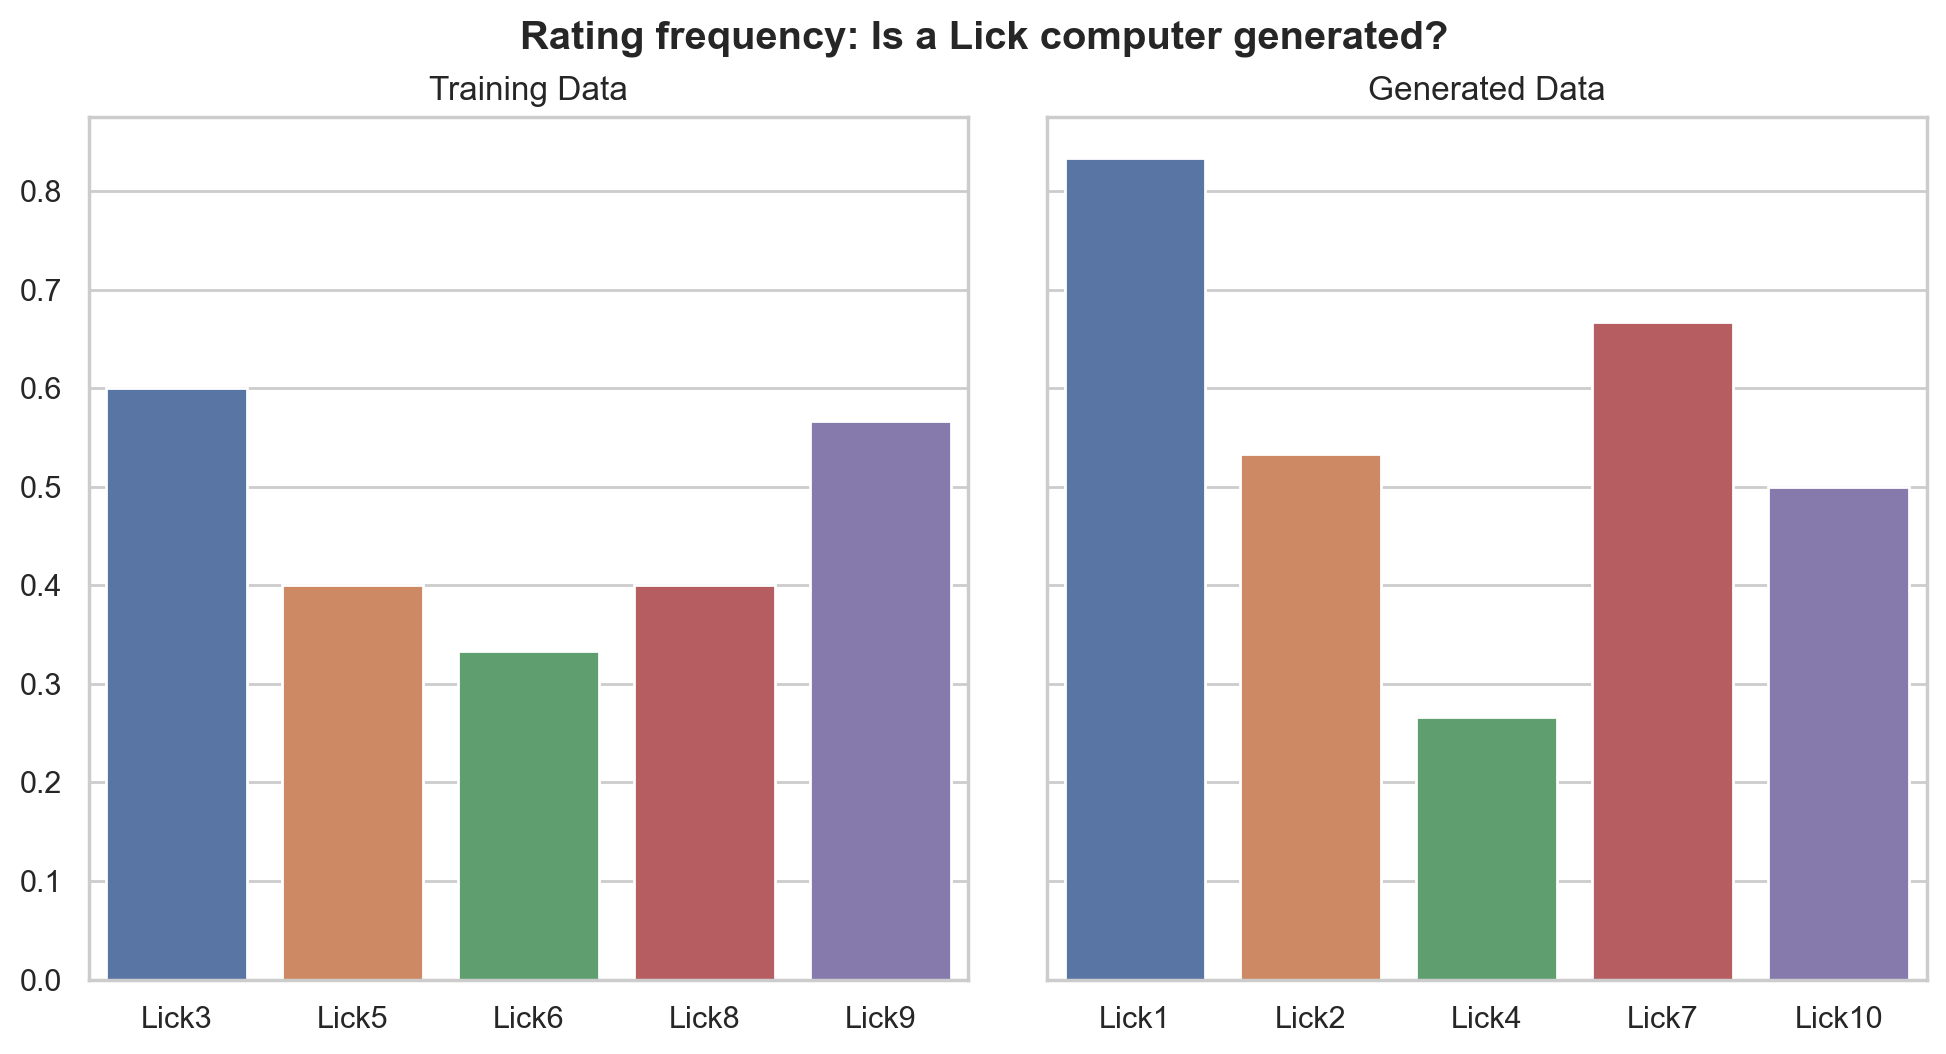

In [5]:
# Subplots to show the frequency of correctly rated Licks
# The Left plot shows the training data : 
# A low frequency whould show that the students recognized those as training data
# Right Plot shows the generated data:
# A high Bar shows that the students recognized the Lick as a generated one

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
fig.tight_layout()
sns.barplot(data=training_licks_df, 
            errorbar=None, ax=axes[0])
sns.barplot(data=generated_licks_df, 
            errorbar=None, ax=axes[1])
axes[0].title.set_text("Training Data")
axes[1].title.set_text("Generated Data")
fig.suptitle("Rating frequency: Is a Lick computer generated?", 
             y=1.05,
             fontweight='bold')
plt.savefig('imgs/IG_barplot_rating.png', dpi=150)
plt.show()

## Evaluation Plot 2 : How good is a generated Lick?

In [6]:
rating_indices_training = [num + 11 for num in training_indices]
rating_indices_gen = [num + 11 for num in generated_indices]

training_licks_df = df[df.columns[[10] + rating_indices_training]]
generated_licks_df = df[df.columns[[10] + rating_indices_gen]]

# Split Training and Gen Df in Dfs with jazz musicians and not 
no_jazz_training = training_licks_df[training_licks_df["Jazz"]]
true_jazz_training = training_licks_df[training_licks_df["Jazz"] == False]
no_jazz_gen = generated_licks_df[generated_licks_df["Jazz"]]
true_jazz_gen = generated_licks_df[generated_licks_df["Jazz"] == False]

In [7]:
# Using the Summed Median of a Category as an approximate Score
# The Higer the Score the better was the overall Liking of the Lick
xm_njt = no_jazz_training.iloc[:, 1:].median().sum()
xm_tjt = true_jazz_training.iloc[:, 1:].median().sum()
xm_njg = no_jazz_gen.iloc[:, 1:].median().sum()
xm_tjg = true_jazz_gen.iloc[:, 1:].median().sum()

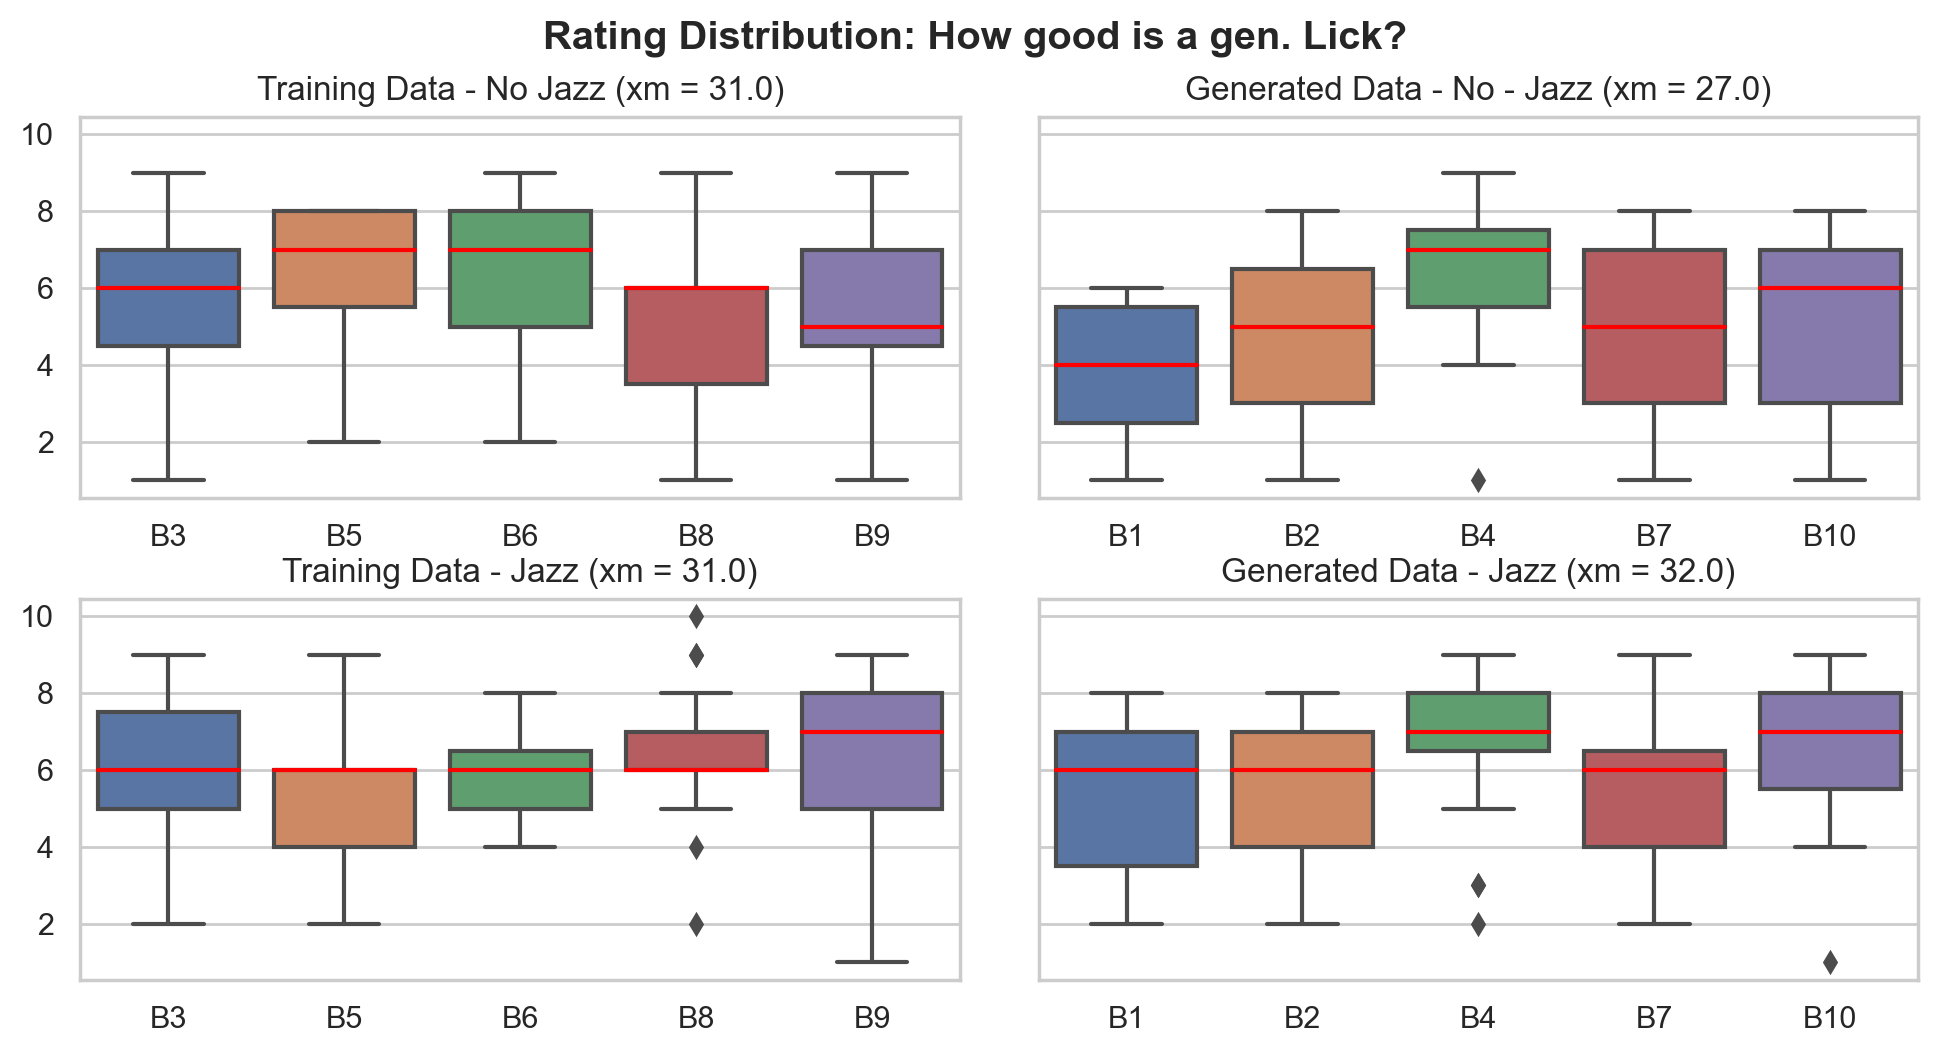

In [8]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10, 5))
fig.tight_layout()

sns.boxplot(data=no_jazz_training.iloc[:, 1:], 
            medianprops={"color": "red"},
            ax=axes[0, 0])

sns.boxplot(true_jazz_training.iloc[:, 1:], 
            medianprops={"color": "red"},
            ax=axes[1, 0])

sns.boxplot(no_jazz_gen.iloc[:, 1:], 
            medianprops={"color": "red"},
            ax=axes[0, 1])

sns.boxplot(true_jazz_gen.iloc[:, 1:], 
            medianprops={"color": "red"},
            ax=axes[1, 1])


axes[0, 0].title.set_text(f"Training Data - No Jazz (xm = {xm_njt})")
axes[0, 1].title.set_text(f"Generated Data - No - Jazz (xm = {xm_njg})")
axes[1, 0].title.set_text(f"Training Data - Jazz (xm = {xm_tjt})")
axes[1, 1].title.set_text(f"Generated Data - Jazz (xm = {xm_tjg})")

fig.suptitle("Rating Distribution: How good is a gen. Lick?", 
             y=1.05,
             fontweight='bold')
plt.savefig('imgs/IG_boxplot_rating.png', dpi=150)
plt.show()

# Musical Analysis
NOTE: The Display of the Melody Score requires a musescore3 installation

In [12]:
# Assert no overfitted Licks
for index, epoch_names in enumerate(viable_names):
    print(f'Epoch: {epochs[index+1]}', choices(epoch_names, k=1))

Epoch: 5 ['Generated_Lick_both_8.mid']
Epoch: 35 ['Generated_Lick_both_25.mid']
Epoch: 70 ['Generated_Lick_both_98.mid']
Epoch: 80 ['Generated_Lick_both_43.mid']
Epoch: 90 ['Generated_Lick_both_4.mid']
Epoch: 180 ['Generated_Lick_both_123.mid']


In [13]:
file_ep5 = 'generated_midi/both/Ep5_Test/Generated_Lick_both_8.mid'
file_ep35 = 'generated_midi/both/Ep35_Test/Generated_Lick_both_25.mid'
file_ep70 = 'generated_midi/both/Ep70_Test/Generated_Lick_both_98.mid'
file_ep80 = 'generated_midi/both/Ep80_Test/Generated_Lick_both_43.mid'
file_ep90 = 'generated_midi/both/Ep90_Test/Generated_Lick_both_4.mid'
file_ep180 = 'generated_midi/both/Ep180_Test/Generated_Lick_both_123.mid'

files = [file_ep5, file_ep35, file_ep70, file_ep80, file_ep90, file_ep180]
melody_scores = [converter.parse(file) for file in files]

### Epoch 5
* Note-Pitches:
    * Bar 1: Is written in Cm-maj7 which does not fit very well. Mainly the natural B does not fit to the intendet II of Bb (cm7). The Frequency of iconic cm7 notes is pretty low (Just 2 Eb's).
    * Bar 2: The tone-material seems okay - but typical notes for a F7 chord are missing like a's on a better position.
    * Bar 3: The Licks ends on a fitting Note of a Bbmaj7 Chord (Bb as the root)
* Rhythm:
    * Due to the training data (mainly chain of 8ths) the network learns this pattern pretty quick, because there is no big variance.
* Intervals:
    * Bar 1 and 2 shows a lot of Jumps which is not a good sign - Jazz Licks should contain clear Lines

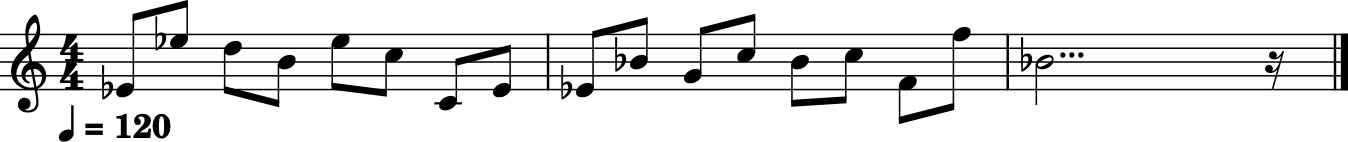

In [14]:
melody_scores[0].show()

### Epoch 35
* Note-Pitches:
    * Bar 1: This bar shows a lot of characteristics of cm7 tone material. In comparrison with Ep5 it takes the Bb instead of a B natural. But the third is missing, so no one could tell if its a cm7 oder a C7. At the end are some repetitive elements.
    * Bar 2: Same repetitive Element like in Bar 1 (Bb).
    * Bar 3: Still ends on a fitting note (fifth)
* Rhythm:
    * Due to the training data (mainly chain of 8ths) the network learns this pattern pretty quick, because there is no big variance.
* Intervals:
    * Bar 1: Shows a lot more repetitive elements which doesnt sounds very natural. But the Bar has smaller Jumps then the previous one.
    * Bar 2: Same thing like Bar 1 - rep. elements and small jumps make a strange result

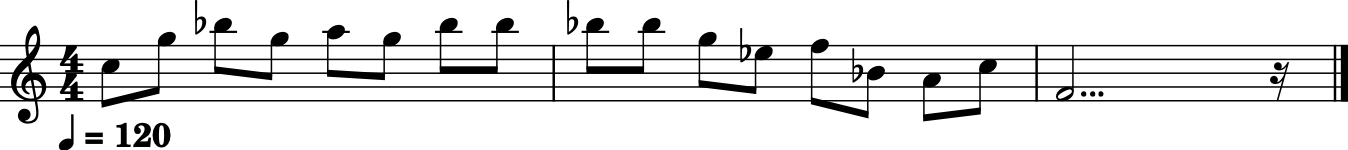

In [15]:
melody_scores[1].show()

### Epoch 70
* Note-Pitches: 
    * Bar 1 is fine: Shows typical cm7 (dorian) tone material
    * Bar 2 trys to imitate an alterated scale with the c# 
* Rhythm:
    * Due to the training data (mainly chain of 8ths) the network learns this pattern pretty quick, because there is no big variance.
* Intervals:
    * Bar 1: Starts with a big Jump which does not sound very good. But after this some small steps are taken which is fine.
    * Bar 2: Shows a lot repetitive Elements which sounds not very good, because of this the 'alterated' sound is not very clear. The transition to Bar 3 is good.

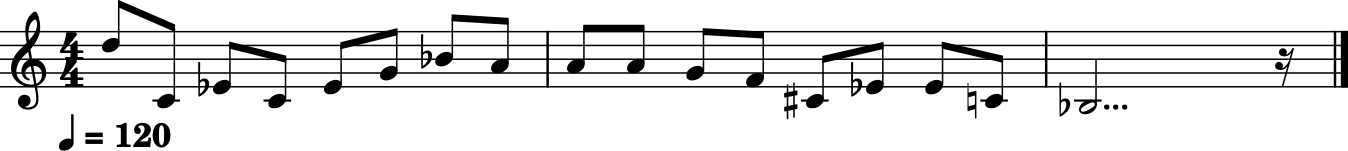

In [19]:
melody_scores[2].show()

### Epoch 80
* Note-Pitches: 
    * Shows a cm7-F7-Bbmaj7 cadencial scheme based on aeloian-mixolydian-ionian mode (note material)
* Rhythm:
    * Due to the training data (mainly chain of 8ths) the network learns this pattern pretty quick, because there is no big variance.
* Intervals:
    * Bar 1: Starts on the 9th and jumps a fifth to its fifth. After this a line is build with some repetitive elements. Characteristic notes of cm7 are missing (Eb).
    * Bar 2: Shows a good amount of dominant notes but still got plenty of repetitive elements and a weird ending with a jump to the tonic

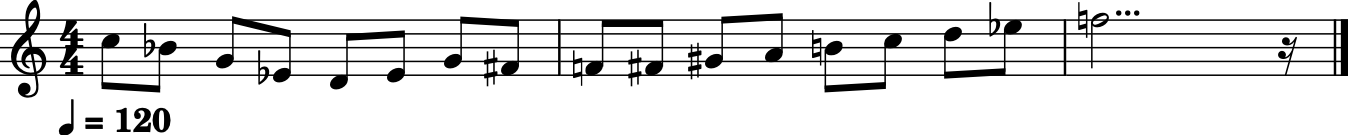

In [20]:
melody_scores[3].show()

### Epoch 90
* Note-Pitches: 
    * Bar 1 is fine, the g# seems to be a wrong interpreted Ab which resolves with a chromatic approach to Bar 2 - Which is pretty nice
    * Bar 2 Repeats the previous transition which could be better with another note. The Chromatical Line from F#, F to the Eb sounds good. The end resembles a dm7 chord as a melody to the next Bar - which sounds pretty Jazzy.
* Rhythm:
    * Due to the training data (mainly chain of 8ths) the network learns this pattern pretty quick, because there is no big variance.
* Intervals:
    * Bar 1 Starts with a weird fifth, afterwards clear lines are visible

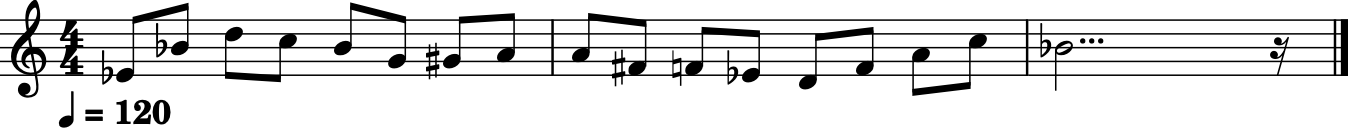

In [21]:
melody_scores[4].show()

### Epoch 180
* Note-Pitches: 
    * Shows a cm7-F7-Bbmaj7 cadencial scheme based on aeloian-mixolydian-ionian mode (note material)
* Rhythm:
    * Due to the training data (mainly chain of 8ths) the network learns this pattern pretty quick, because there is no big variance.
* Intervals:
    * Bar 1: Starts on the third and builds up a nice line which transits to Bar 2
    * Bar 2: Starts with a am(b5) triad which transits to an alterated ending to the Third of Bar 3 which sounds like a lot Jazz Licks

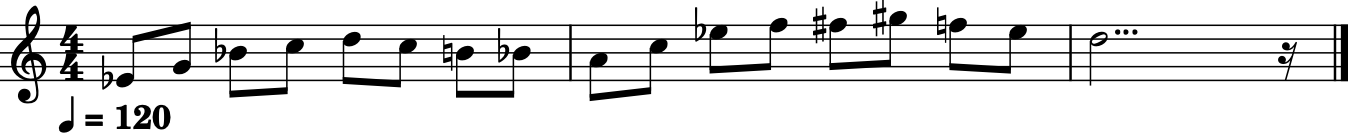

In [23]:
melody_scores[5].show()

# Conclusion
* Bar 1: The network learns pretty much which notes are important for the First Bar (cm7 - aeolian). Apart from epoch 5 all epochs learned the right note material and which note to start with, because most of Bar 1s are starting with notes from a cm7-chord. After this the first epochs likes to build with repetitive elements and jumps. Later on the network tries to build more meaningfull lines and transitions to bar 2. Thus some repetitiv elements and jumps are still in the later epochs - but with a much smaller frequency. 
* Bar 2: Shows the highest variance caused by the mix with diatonic and alterated licks. Some licks sound very odd because of the alterated notes and jumps. Later on the networks seems to learn how to build up some tension which are solved by a transition to the tonic in Bar 3.
* Bar 3: Because the Bar 3 has no big variance in the training data the network learns pretty fast how to handle this bar: Long note with a note from a Bb chord (which works even in epoch 5)
* Lick quality: On an objectiv level the licks from epoch 35 and above are technically Jazz Licks which supports the harmonic scheme of cadencial II-V-I connection in Bb major. But this does not mean that the licks are sounding good or are inovative. A lot of generated data with high epochs sounds fine and can be used for improvisations, but some times they are lacking of an innovative idea, which makes a Jazz Lick a good Jazz Lick. 
* Summary: The networks shows that it can create solid jazz licks even with a low amount of training data. Depending on the amount and the quality of the data, the lick quality is determined. This project shows that a neuronal network can just generate or learn patterns which are in the training data and cant create new innovative things easily - therefore training data with more variance is needed. It is still pretty fascinating that a LSTM is able to learn the pattern of jazz licks with such a few amount of training data.

# Over All Conclusion
* The Analysis shows that the Modell Learns the Pattern of Jazz Licks highly dependent of the training data
* Thus a pretty similar Variance is shown between the Generated and Training Data (In Pitch and Duration)
* The Results of the Imitation game shows:
    * Some Generated Licks seems to be easier to recognize them as generated (Lick1 in Bar Chart), On the other hand some Licks are a lot harder to recognized as generated (Lick4). This shows that the Modell is capable of generating Licks which sound pretty similar to 'Human-generated' Licks. Because the Data was randomly drawn, further investigations have to be done to validate that impression.
    * Indepently of the status of a Lick (generated or not), the Lick can still sound Good on a subjectiv scale. The Boxplot Shows that experts in the jazz domain Rated the Sample of Generated Licks higher then the Sample of the Training Data. However the non Jazz Musicians rated the Training Sample higher then the Generated Sample. At the end 2 Licks of the Generated Samplign have a Pretty High Median which shows, that there is a variance in the Licking dependtly which Lick is regarded. 
* The Musical Analysis Shows how the generated Licks are changing from epoch to epoch. With every new iteration the modell Generats better Licks till it comes to an overfitting.